<a href="https://colab.research.google.com/github/Hassan48khan/CCTV-Surveillance-Framework-for-the-Education-Sector-/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from mtcnn.mtcnn import MTCNN

In [ ]:
img = cv.imread("26f - Copy - Copy.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

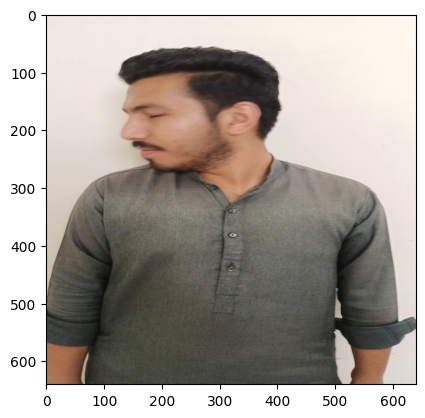

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img) # RGB

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 143ms/step


In [ ]:
x,y,w,h = results[0]['box']

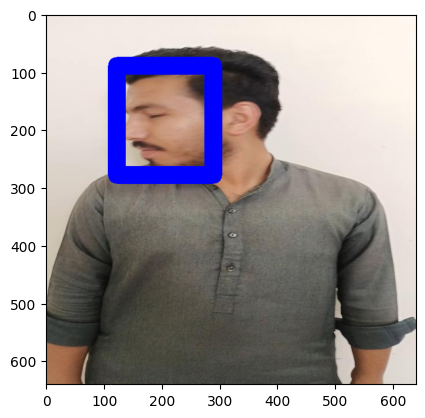

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

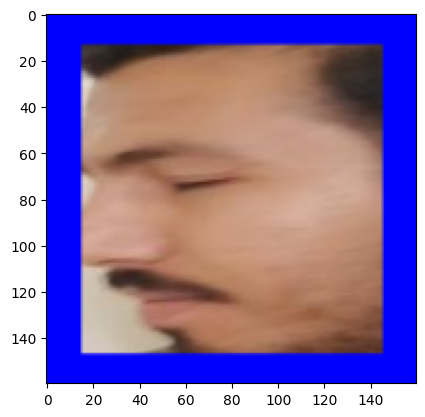

In [ ]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [ ]:
##Automate the preprocessing

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(60,30))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [ ]:
faceloading = FACELOADING("//content/drive/MyDrive/face")
X, Y = faceloading.load_classes()

Loaded successfully: 120
Loaded successfully: 120
Loaded successfully: 119
Loaded successfully: 119
Loaded successfully: 118
Loaded successfully: 120


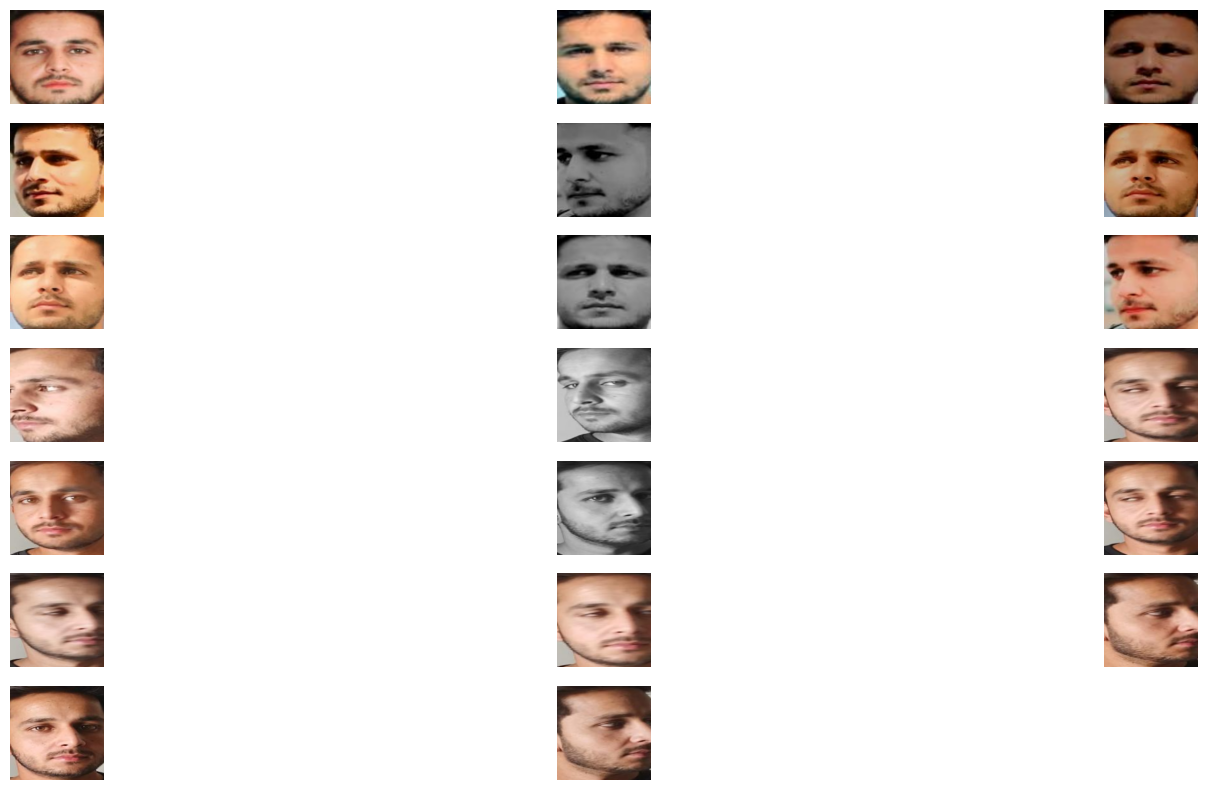

In [ ]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images_to_display = 20

# Adjust the figure size based on the number of images
plt.figure(figsize=(20, 10))

for num, image in enumerate(X[:num_images_to_display]):  # Slice to limit to 20 images
    ncols = 3
    nrows = num_images_to_display // ncols + 1
    plt.subplot(nrows, ncols, num + 1)
    plt.imshow(image)
    plt.axis('off')

plt.show()


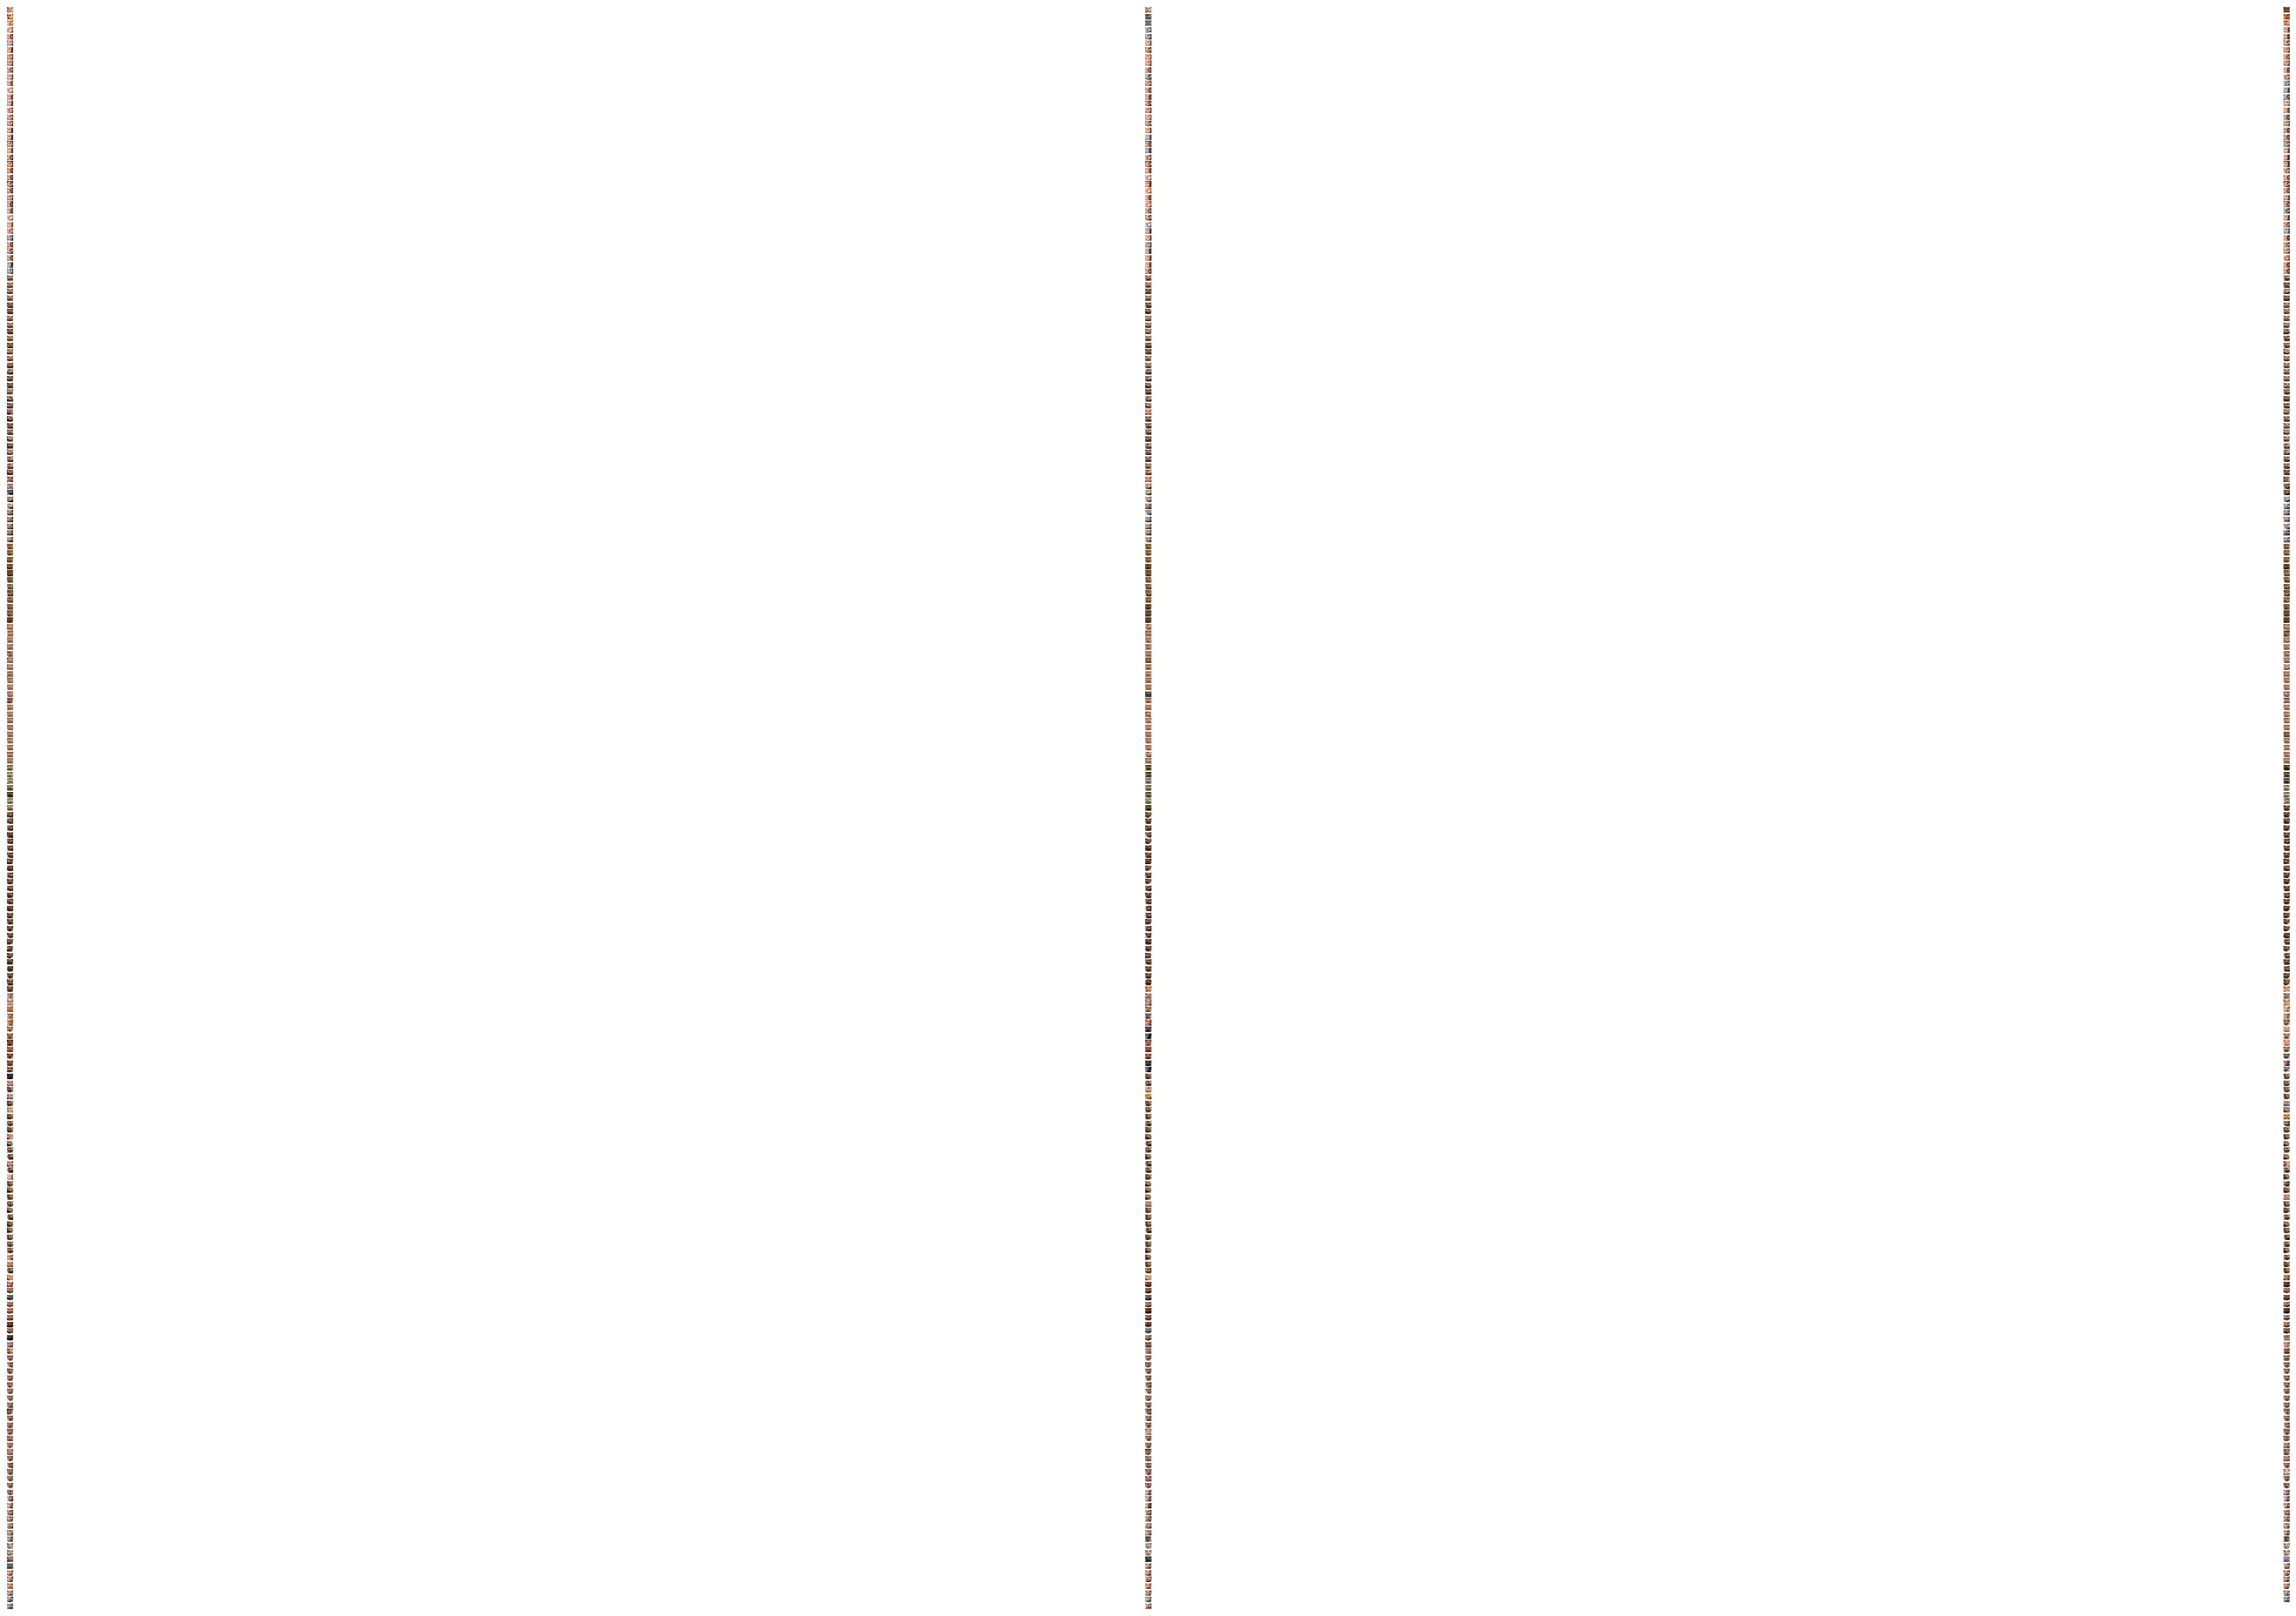

In [ ]:
plt.figure(figsize=(60, 30))
for num, image in enumerate(X):
    ncols = 3
    nrows = len(Y) // ncols + 1
    plt.subplot(nrows, ncols, num + 1)
    plt.imshow(image)
    plt.axis('off')



In [ ]:
##FaceNet part

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=68f77990e59e34fe83a0a0fc1116f84c50dd2716da1db1ba45ad7ec11104792b
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

In [ ]:
np.savez_compressed('faces_embeddings_done_6classes.npz', EMBEDDED_X, Y)   # to save a facenet embedding file which we created through facent model

In [ ]:
X

array([[[[ 22,  17,  11],
         [ 22,  17,  11],
         [ 22,  17,  11],
         ...,
         [ 40,  36,  27],
         [ 41,  37,  28],
         [ 40,  36,  27]],

        [[ 21,  16,  10],
         [ 21,  16,  10],
         [ 20,  15,   9],
         ...,
         [ 40,  36,  27],
         [ 40,  36,  27],
         [ 38,  35,  26]],

        [[ 20,  15,   9],
         [ 19,  14,   8],
         [ 20,  15,   9],
         ...,
         [ 35,  31,  22],
         [ 36,  32,  23],
         [ 35,  31,  22]],

        ...,

        [[214, 192, 168],
         [213, 191, 167],
         [219, 198, 174],
         ...,
         [187, 127,  94],
         [171, 117,  87],
         [146,  98,  75]],

        [[216, 194, 170],
         [214, 194, 169],
         [219, 199, 175],
         ...,
         [186, 126,  93],
         [170, 116,  87],
         [146,  99,  73]],

        [[216, 196, 171],
         [216, 196, 171],
         [218, 198, 174],
         ...,
         [187, 128,  94],
        

In [ ]:
##SVM MODEL

In [ ]:
from sklearn.preprocessing import LabelEncoder   # imports a class called LabelEncoder from the scikit-learn library, which is used for encoding categorical data.

encoder = LabelEncoder()  # creates an instance of the LabelEncoder class, ready to be used for encoding.
encoder.fit(Y)   # analyzes the input data Y (which likely contains categorical labels) and learns the unique labels present in it. This step creates a mapping between the original labels and numerical codes.
Y = encoder.transform(Y)

Text(0, 0.5, '5')

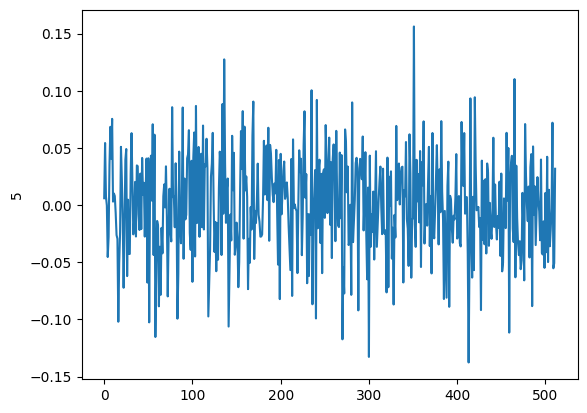

In [ ]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
class_names = [
    "Ahmed-S20-0125-IT",
    "Aqib-S20-0122-IT",
    "Farhat-S20-0103-IT",
    "Haider-S20-0144-IT",
    " Hassan-S20-0120-IT",
    "M.Hassan-S20-0133-IT"
]


In [ ]:
# Assuming you have the predictions ypreds_test and the true labels Y_test
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for the test set
confusion_mat_test = confusion_matrix(Y_test, ypreds_test)


Accuracy: 100.00%


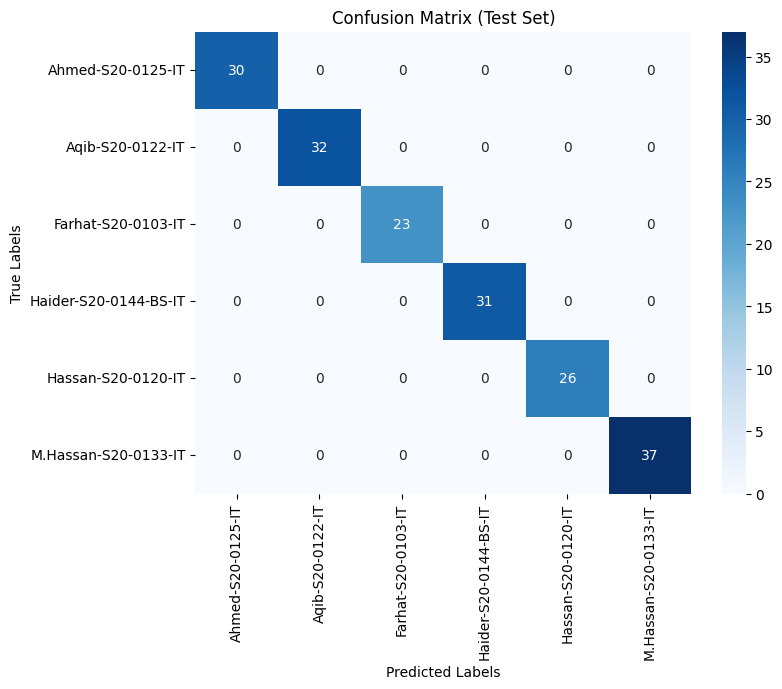


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 31.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 26.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 179.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 179.0}}


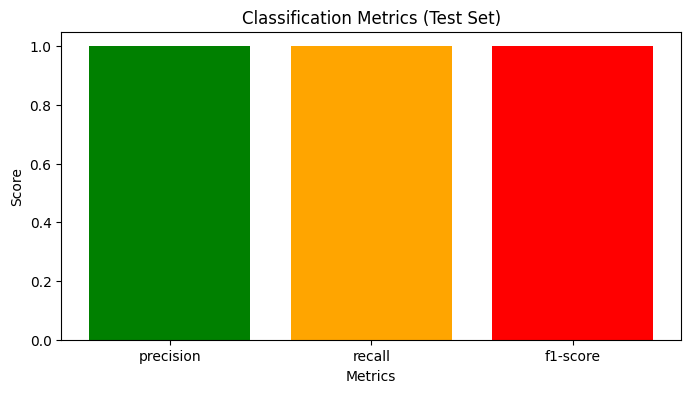

In [ ]:
# Assuming 'encoder' is already defined, and 'Y' is the list of original labels

# Define class names using the encoder
class_names = encoder.classes_

# Make predictions on the test set
ypreds_test = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, ypreds_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate classification report
class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)
print("\nClassification Report:")
print(class_report)

# Plot precision, recall, and F1-score for each class
metrics = ['precision', 'recall', 'f1-score']
values = [class_report['weighted avg'][metric] for metric in metrics]
plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color=['green', 'orange', 'red'])
plt.title("Classification Metrics (Test Set)")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.show()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Testing KNN...
Accuracy: 100.00%


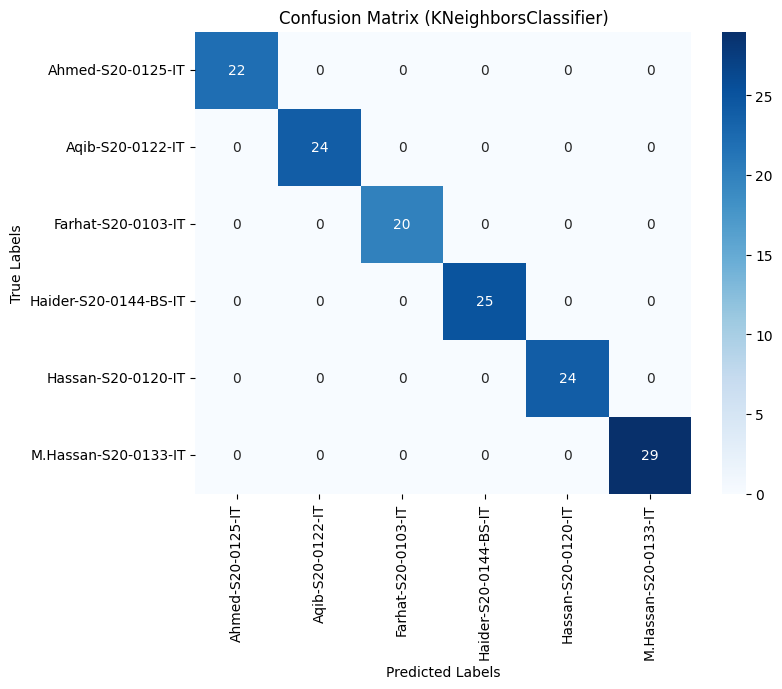


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


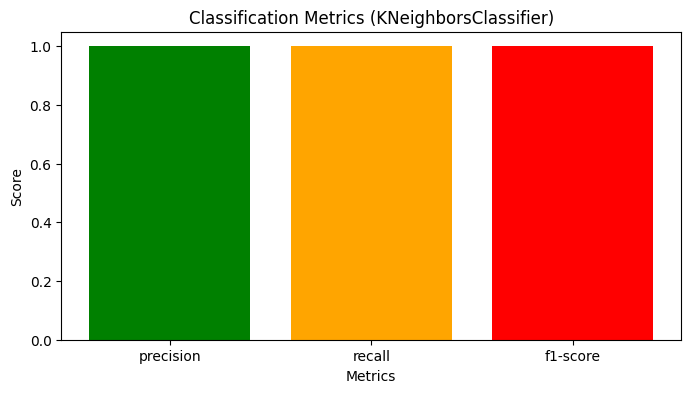


Testing Random Forest...
Accuracy: 100.00%


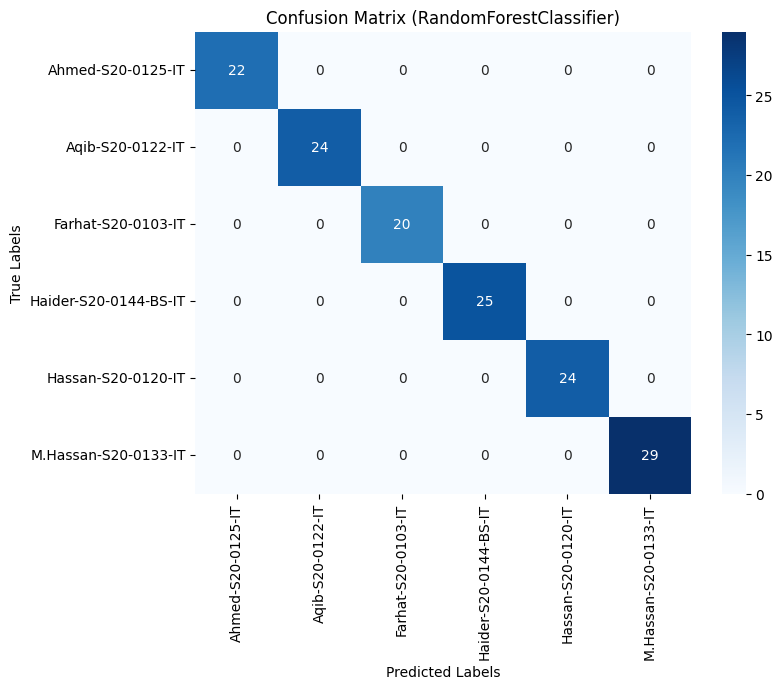


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


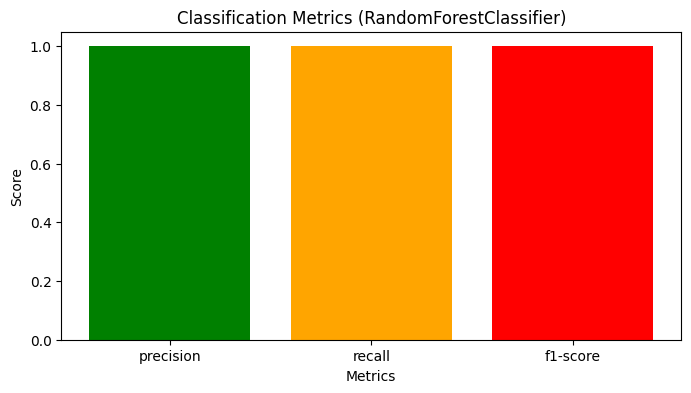


Testing Gradient Boosting...
Accuracy: 98.61%


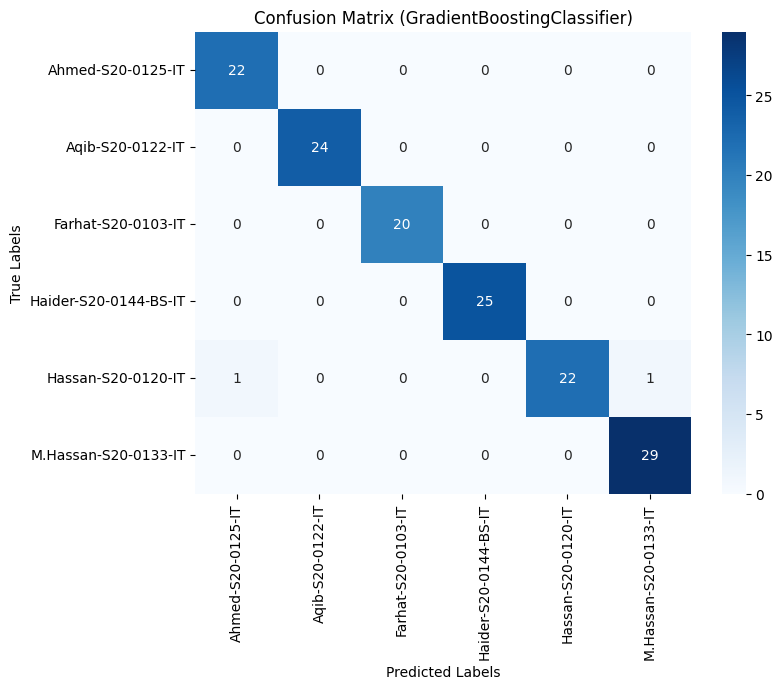


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 0.9565217391304348, 'recall': 1.0, 'f1-score': 0.9777777777777777, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 0.9166666666666666, 'f1-score': 0.9565217391304348, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 0.9666666666666667, 'recall': 1.0, 'f1-score': 0.9830508474576272, 'support': 29.0}, 'accuracy': 0.9861111111111112, 'macro avg': {'precision': 0.9871980676328502, 'recall': 0.9861111111111112, 'f1-score': 0.9862250607276399, 'support': 144.0}, 'weighted avg': {'precision': 0.9866445249597423, 'recall': 0.9861111111111112, 'f1-score': 0.9859451904618939, 'support': 144.0}}


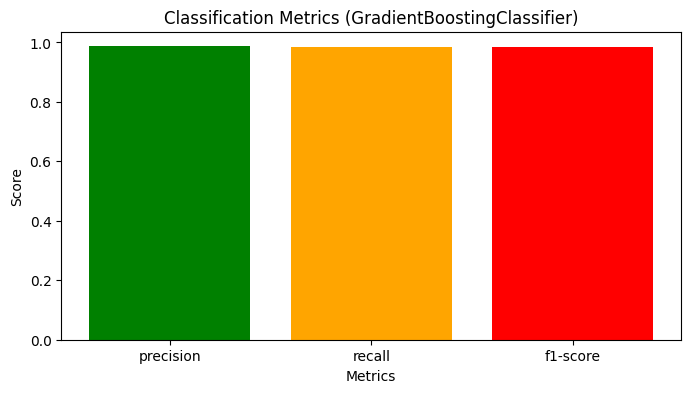


Testing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 100.00%


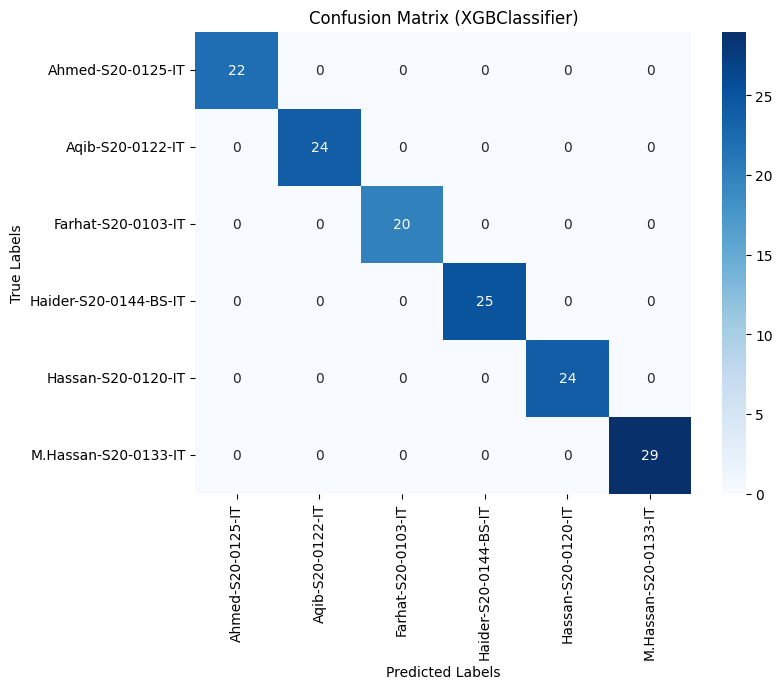


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


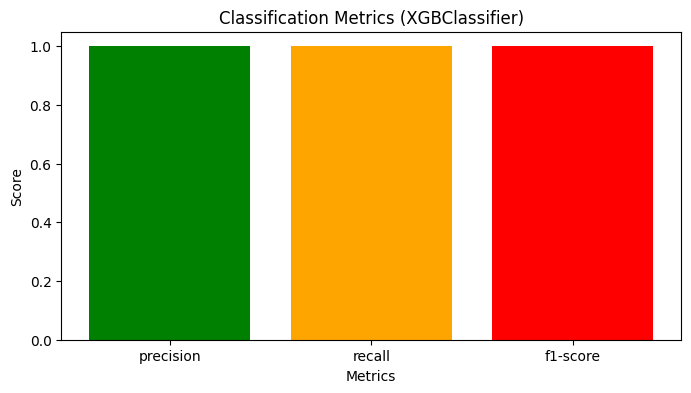


Testing LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97815
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 512
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.754019
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.838279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


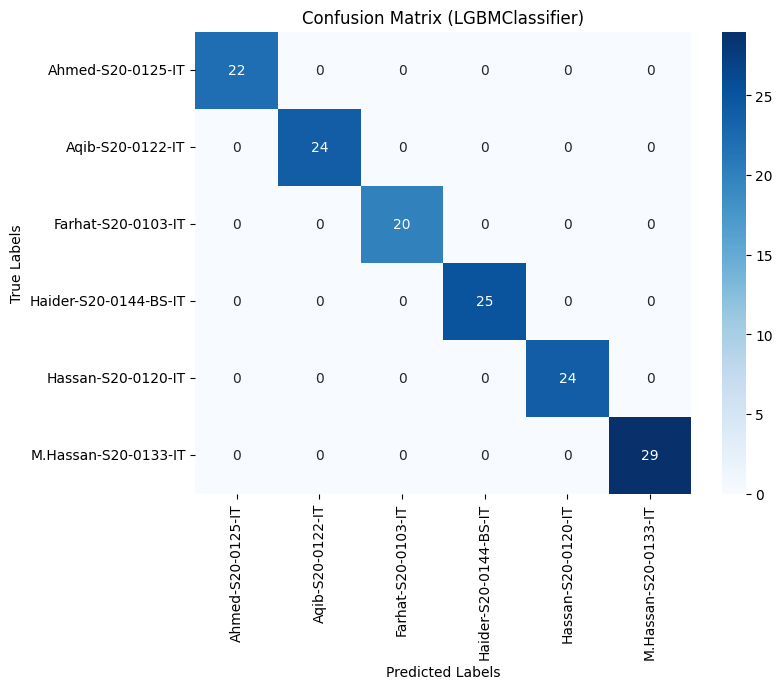


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


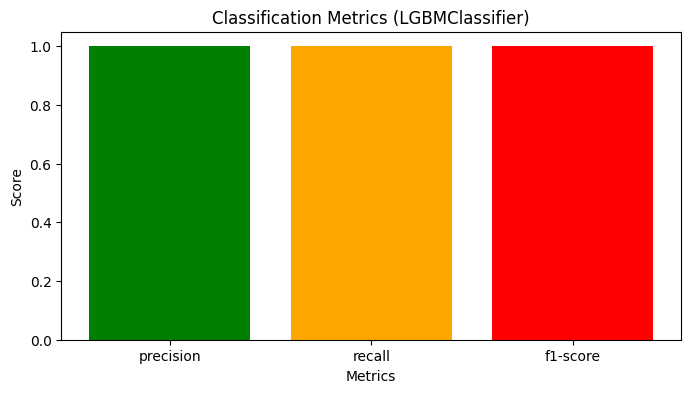


Testing Decision Tree...
Accuracy: 93.06%


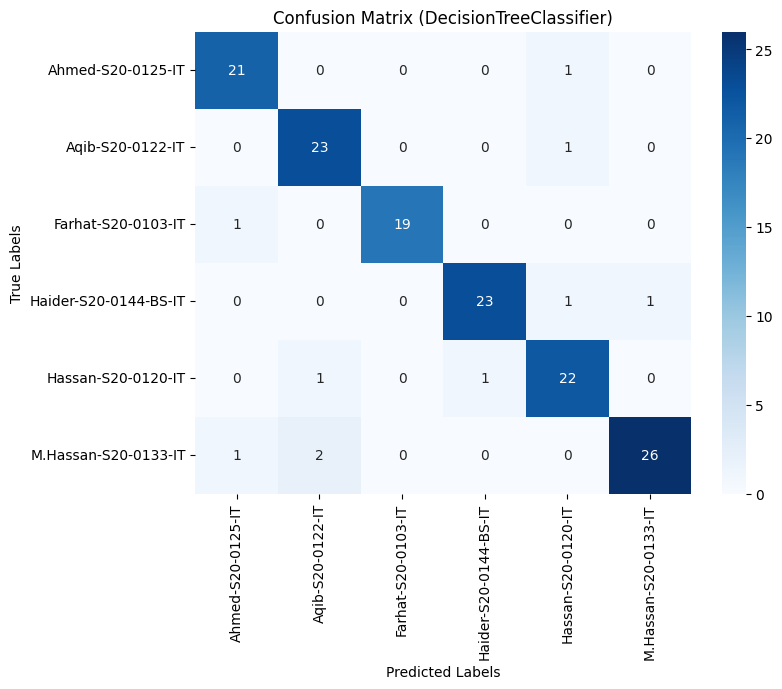


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 0.9130434782608695, 'recall': 0.9545454545454546, 'f1-score': 0.9333333333333333, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 0.8846153846153846, 'recall': 0.9583333333333334, 'f1-score': 0.92, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 0.95, 'f1-score': 0.9743589743589743, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 0.88, 'recall': 0.9166666666666666, 'f1-score': 0.8979591836734694, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 0.9629629629629629, 'recall': 0.896551724137931, 'f1-score': 0.9285714285714286, 'support': 29.0}, 'accuracy': 0.9305555555555556, 'macro avg': {'precision': 0.9331591931954252, 'recall': 0.9326828631138978, 'f1-score': 0.932166405023548, 'support': 144.0}, 'weighted avg': {'precision': 0.9327915625817196, 'recall': 0.93055555

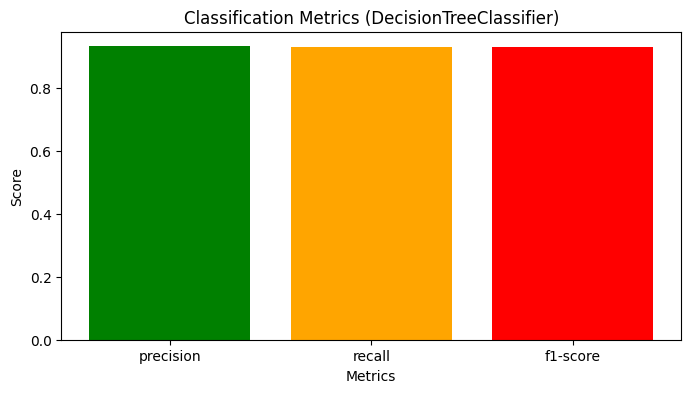


Testing Logistic Regression...
Accuracy: 100.00%


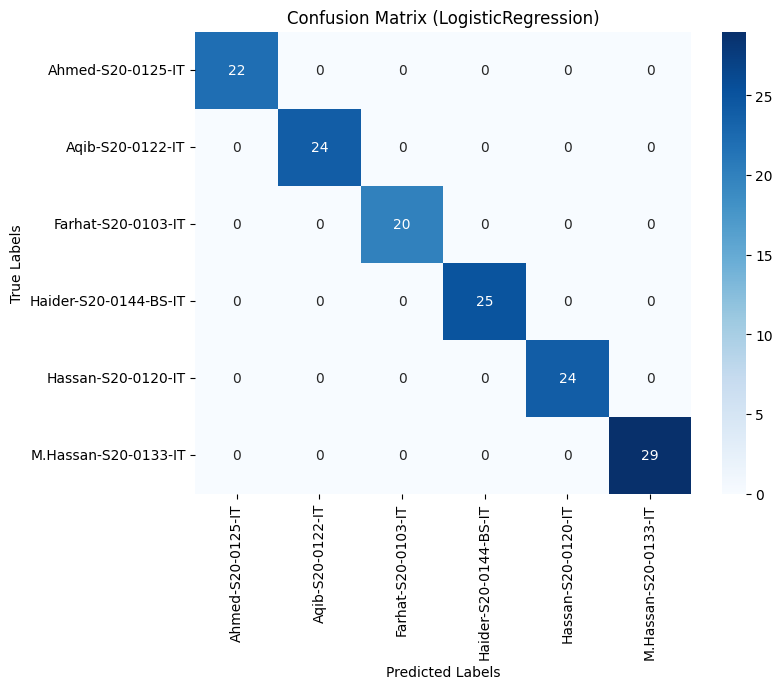


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


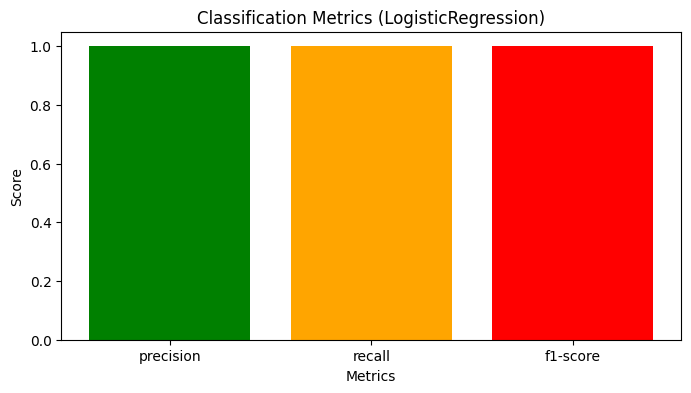


Testing Naive Bayes...
Accuracy: 100.00%


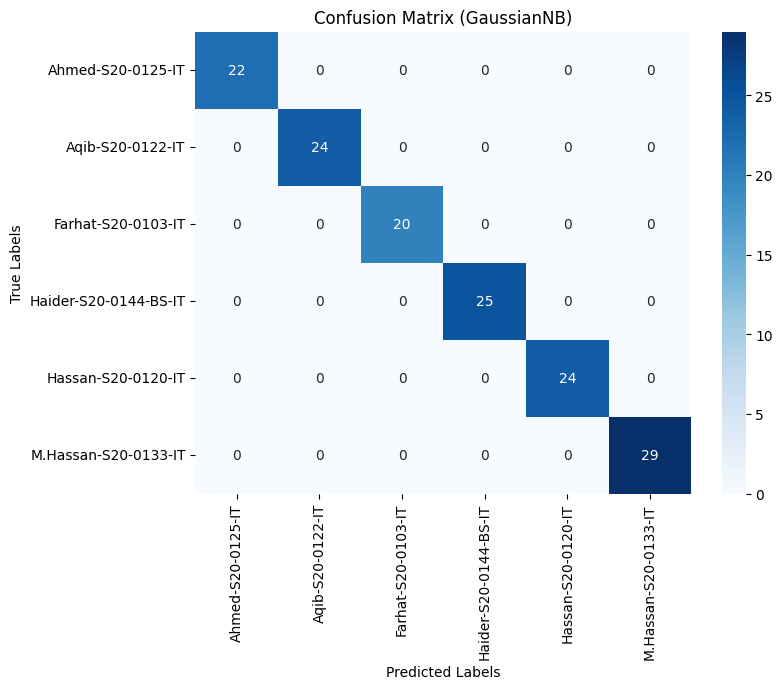


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


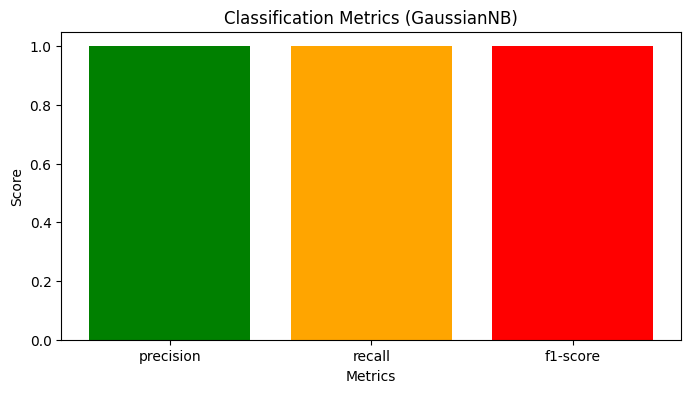


Testing LDA...
Accuracy: 100.00%


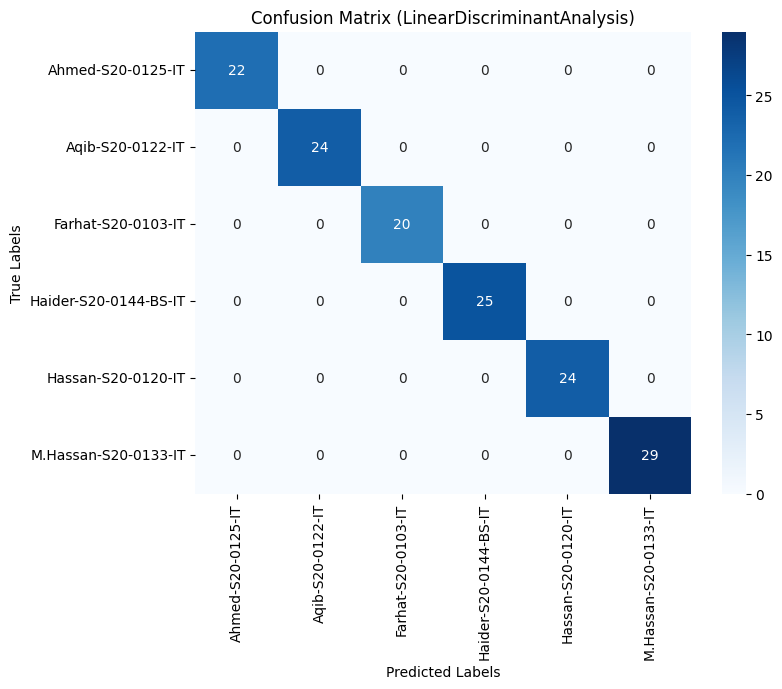


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


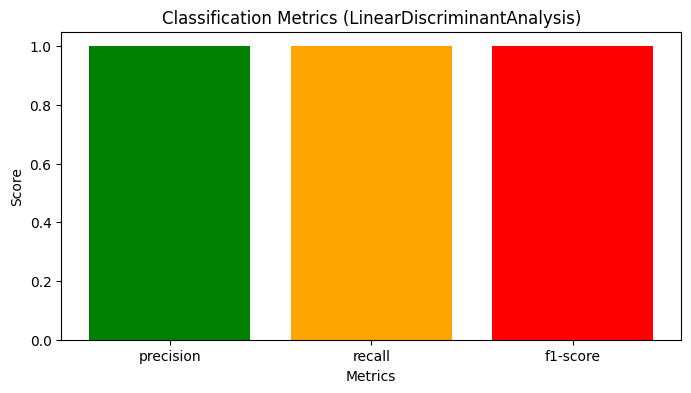


Testing QDA...
Accuracy: 59.03%


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

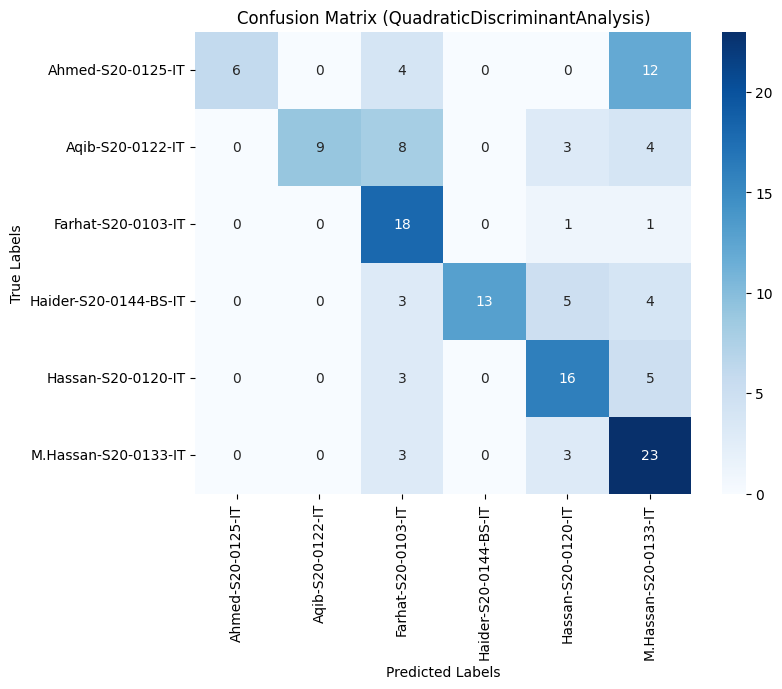


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 0.2727272727272727, 'f1-score': 0.42857142857142855, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 0.375, 'f1-score': 0.5454545454545454, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 0.46153846153846156, 'recall': 0.9, 'f1-score': 0.6101694915254238, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 0.52, 'f1-score': 0.6842105263157895, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 0.5714285714285714, 'recall': 0.6666666666666666, 'f1-score': 0.6153846153846154, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 0.46938775510204084, 'recall': 0.7931034482758621, 'f1-score': 0.5897435897435898, 'support': 29.0}, 'accuracy': 0.5902777777777778, 'macro avg': {'precision': 0.7503924646781789, 'recall': 0.5879162312783003, 'f1-score': 0.5789223661658988, 'support': 144.0}, 'weighted avg': {'precision': 0.7469256933542647, 'recall': 0.5902777777777778, '

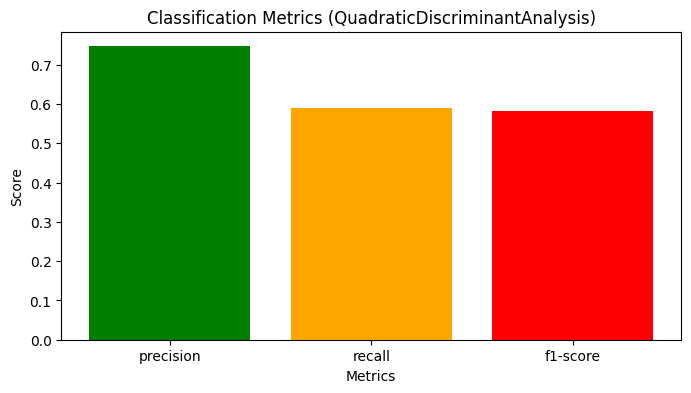


Testing AdaBoost...
Accuracy: 97.92%


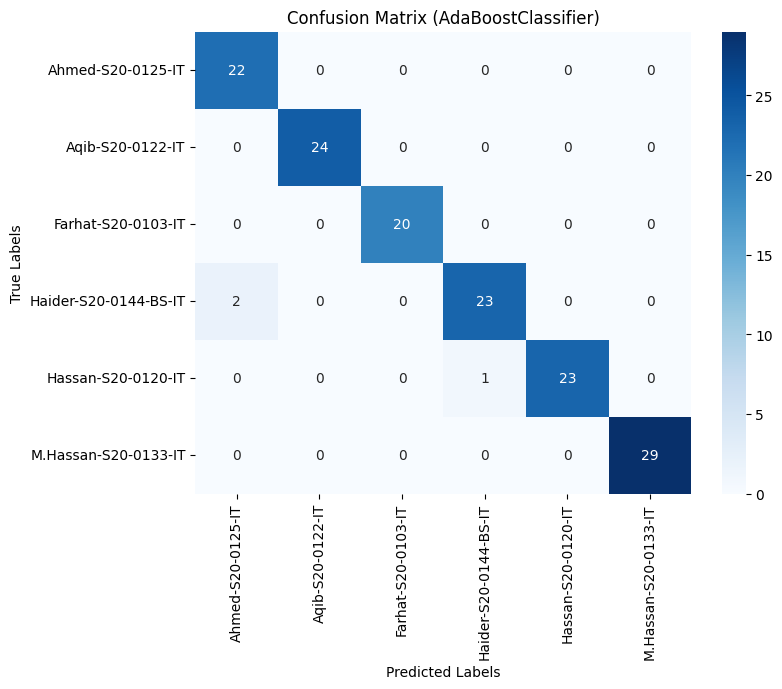


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 0.9166666666666666, 'recall': 1.0, 'f1-score': 0.9565217391304348, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 0.9583333333333334, 'f1-score': 0.9787234042553191, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 0.9791666666666666, 'macro avg': {'precision': 0.9791666666666666, 'recall': 0.9797222222222222, 'f1-score': 0.9790034422649726, 'support': 144.0}, 'weighted avg': {'precision': 0.9800347222222222, 'recall': 0.9791666666666666, 'f1-score': 0.979182136931245, 'support': 144.0}}


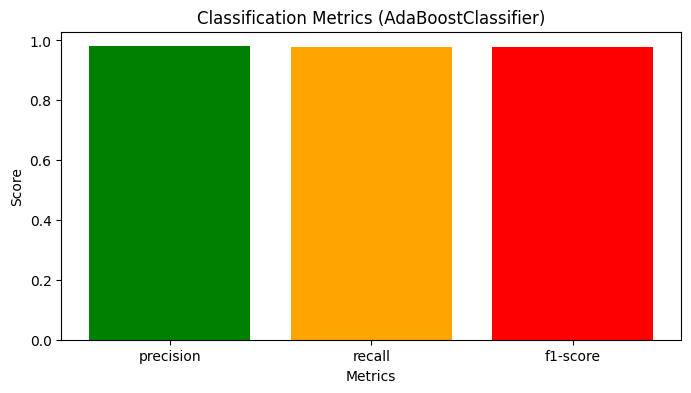

CatBoost is not implemented yet!

Testing SVM...
Accuracy: 100.00%


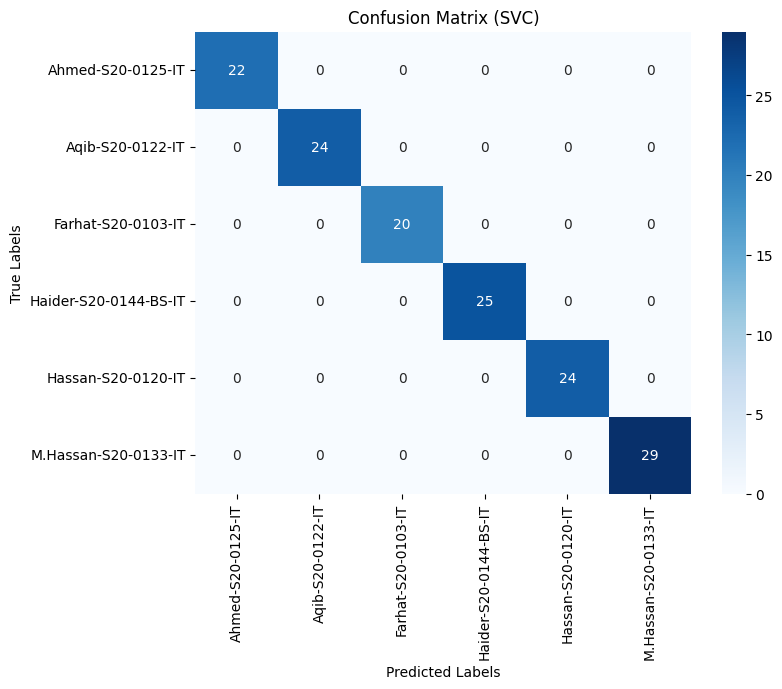


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


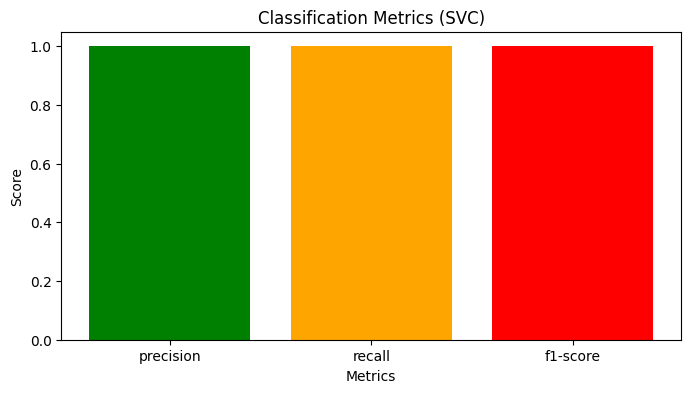


Testing MLP...
Accuracy: 100.00%


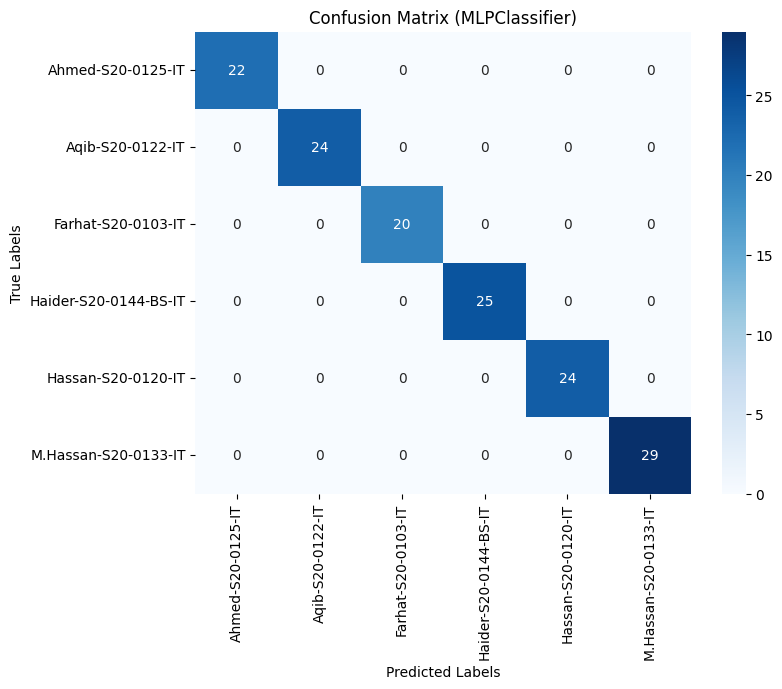


Classification Report:
{'Ahmed-S20-0125-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'Aqib-S20-0122-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Farhat-S20-0103-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Haider-S20-0144-BS-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25.0}, 'Hassan-S20-0120-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'M.Hassan-S20-0133-IT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144.0}}


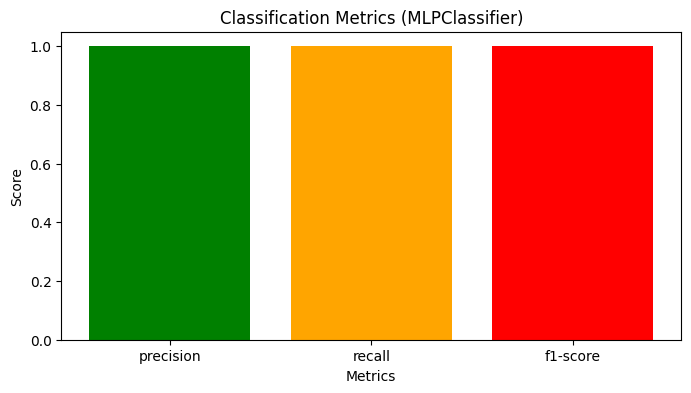

SVR is not implemented yet!
DNN is not implemented yet!
ViT is not implemented yet!
Siamese Networks is not implemented yet!
Triplet Networks is not implemented yet!
Attention Mechanisms is not implemented yet!
GNNs is not implemented yet!


In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming your data is already loaded (EMBEDDED_X for features and Y for labels)
# If needed, split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, test_size=0.2, random_state=42)

# Define classifiers to test
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': None,  # Placeholder (requires installation of catboost)
    'SVM': SVC(kernel='linear', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,)),
    'SVR': None,  # Placeholder (Support Vector Regression)
    'DNN': None,  # Placeholder for Deep Neural Networks (typically requires Keras/TensorFlow)
    'ViT': None,  # Placeholder (Vision Transformers require pre-trained models or HuggingFace library)
    'Siamese Networks': None,  # Placeholder (usually implemented in TensorFlow/Keras)
    'Triplet Networks': None,  # Placeholder (usually implemented in TensorFlow/Keras)
    'Attention Mechanisms': None,  # Placeholder (typically used with CNNs in TensorFlow)
    'GNNs': None  # Placeholder (Graph Neural Networks typically require specialized frameworks)
}

# Function to evaluate a classifier
def evaluate_classifier(clf, X_train, X_test, Y_train, Y_test):
    clf.fit(X_train, Y_train)  # Fit the model
    ypreds = clf.predict(X_test)  # Predict on test data

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, ypreds)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Generate confusion matrix
    confusion_mat_test = confusion_matrix(Y_test, ypreds)

    # Display confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix ({clf.__class__.__name__})")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Classification report
    class_report = classification_report(Y_test, ypreds, target_names=class_names, output_dict=True)
    print("\nClassification Report:")
    print(class_report)

    # Plot precision, recall, and F1-score for each class
    metrics = ['precision', 'recall', 'f1-score']
    values = [class_report['weighted avg'][metric] for metric in metrics]
    plt.figure(figsize=(8, 4))
    plt.bar(metrics, values, color=['green', 'orange', 'red'])
    plt.title(f"Classification Metrics ({clf.__class__.__name__})")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.show()

# Iterate through the classifiers and evaluate them
for clf_name, clf in classifiers.items():
    if clf is not None:
        print(f"\nTesting {clf_name}...")
        evaluate_classifier(clf, X_train, X_test, Y_train, Y_test)
    else:
        print(f"{clf_name} is not implemented yet!")



Testing KNN...

Testing Random Forest...

Testing Gradient Boosting...

Testing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Testing LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97815
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 512
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.754019
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.838279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Testing Decision Tree...

Testing Logistic Regression...

Testing Naive Bayes...

Testing LDA...

Testing QDA...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p


Testing AdaBoost...

Testing SVM...

Testing MLP...


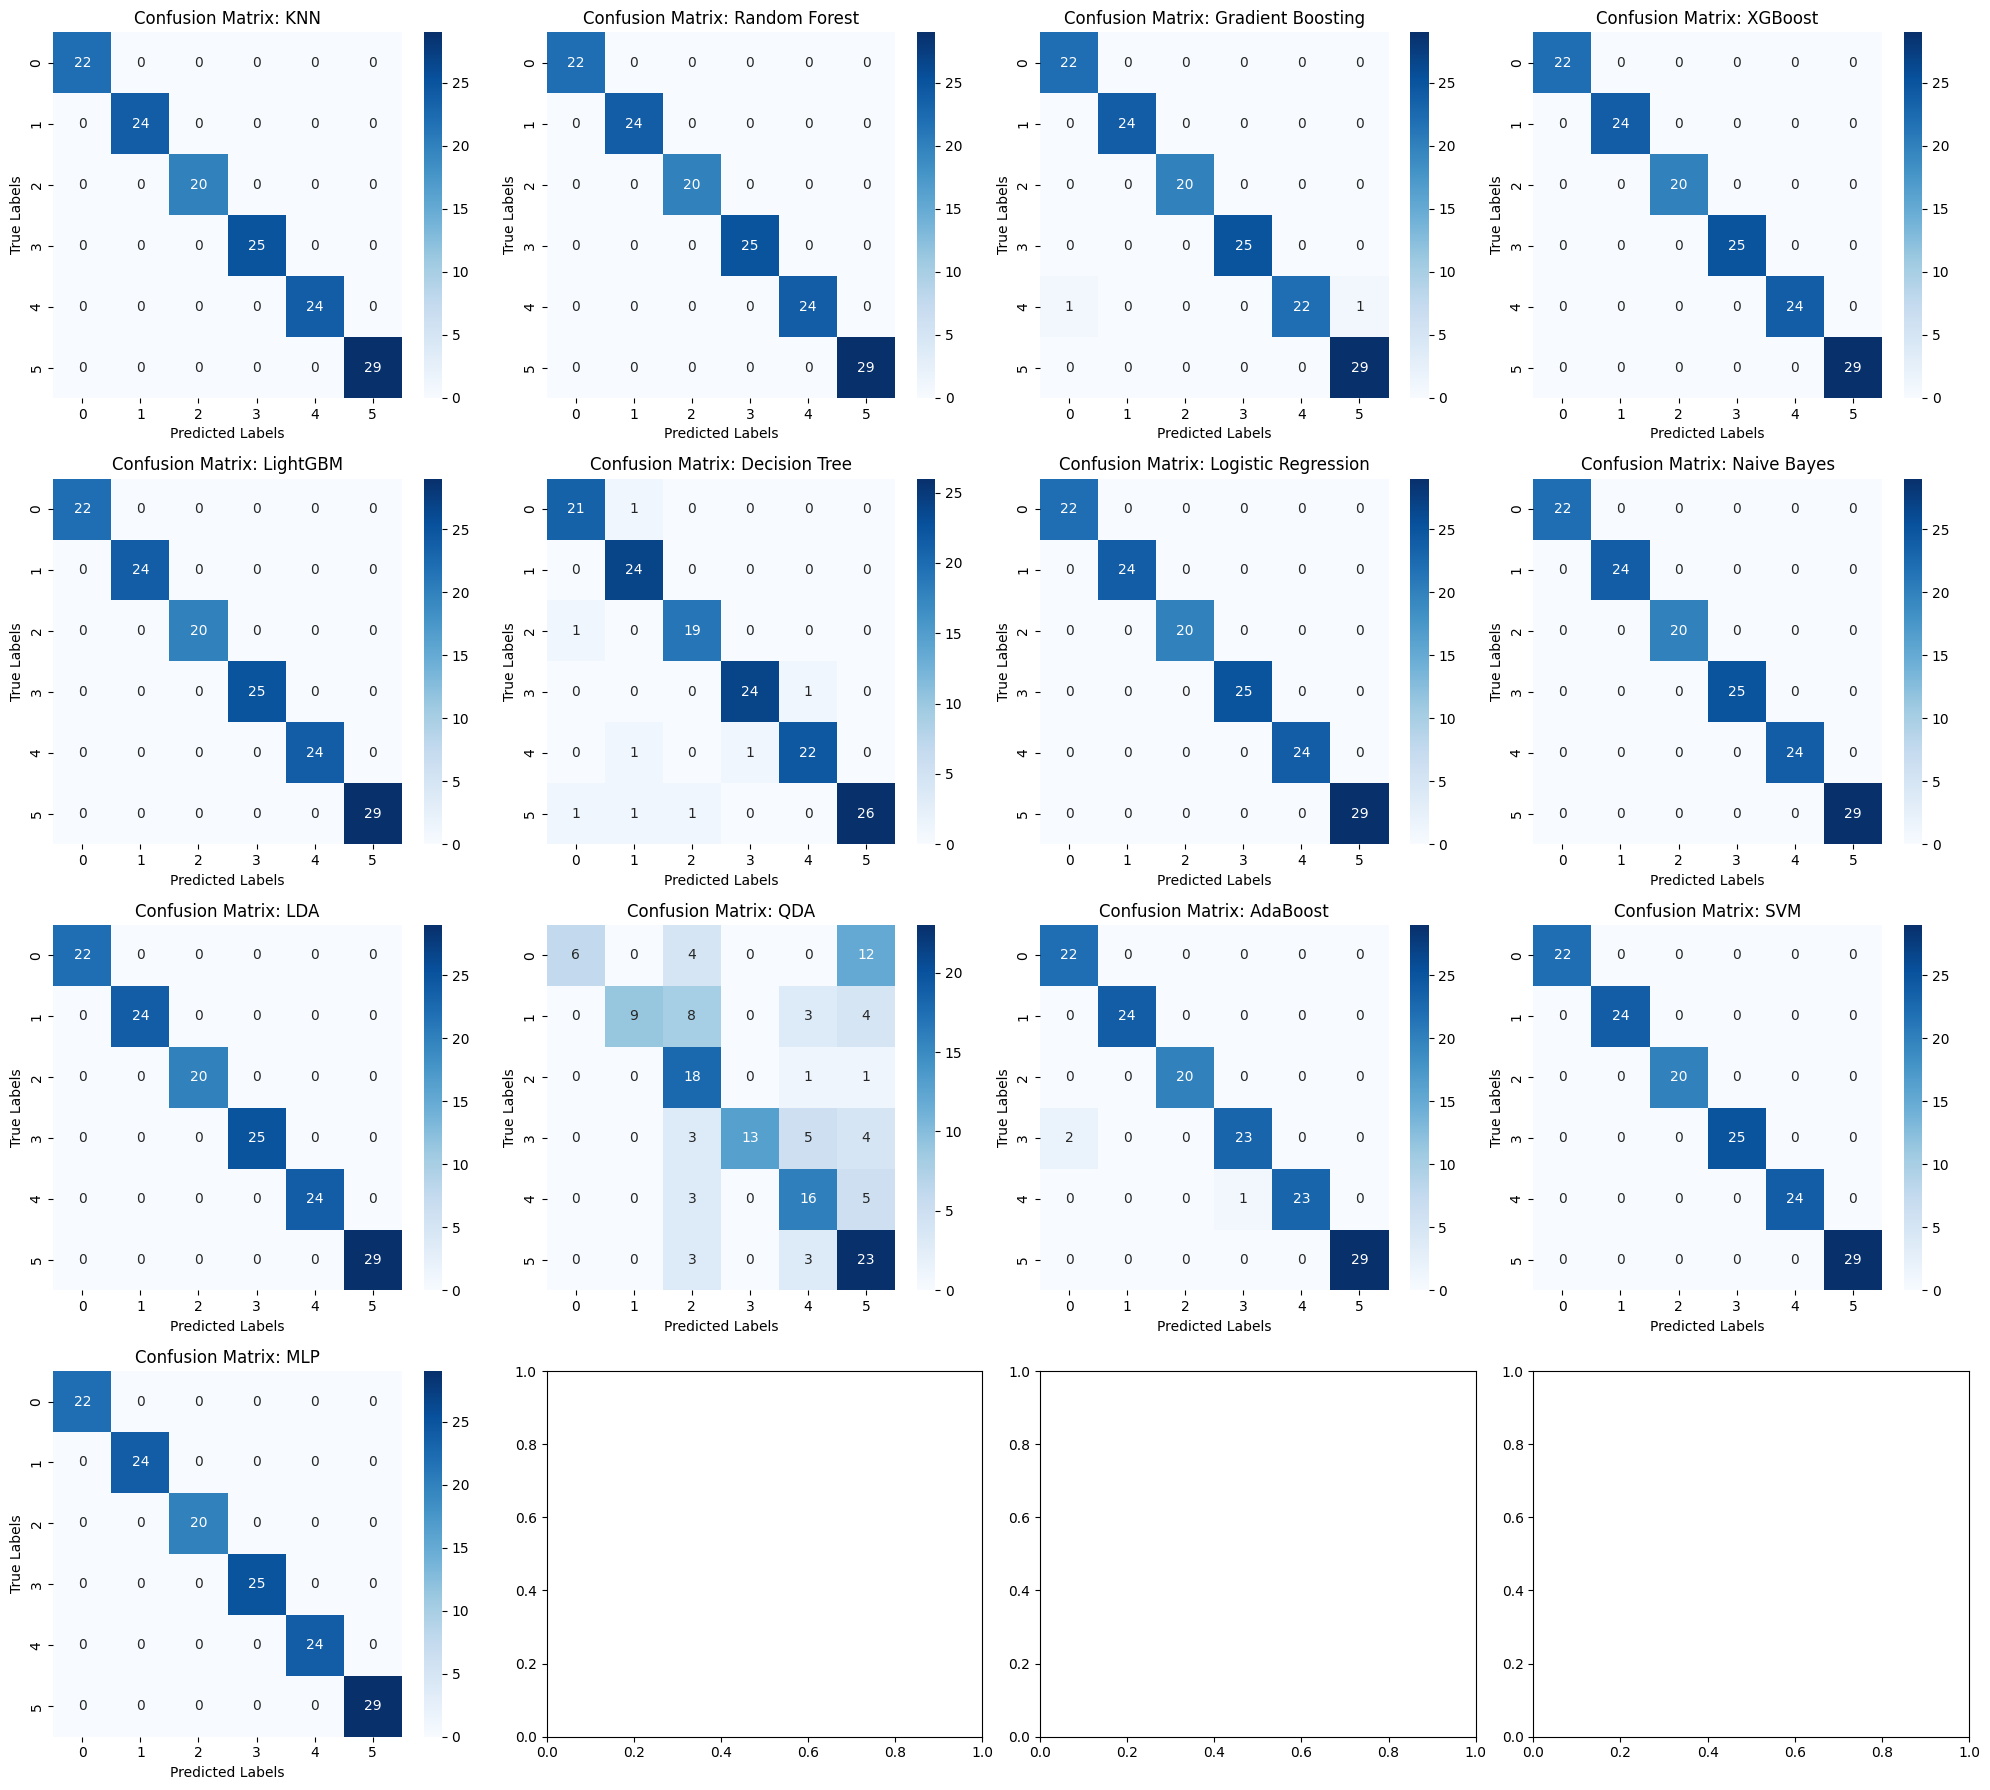

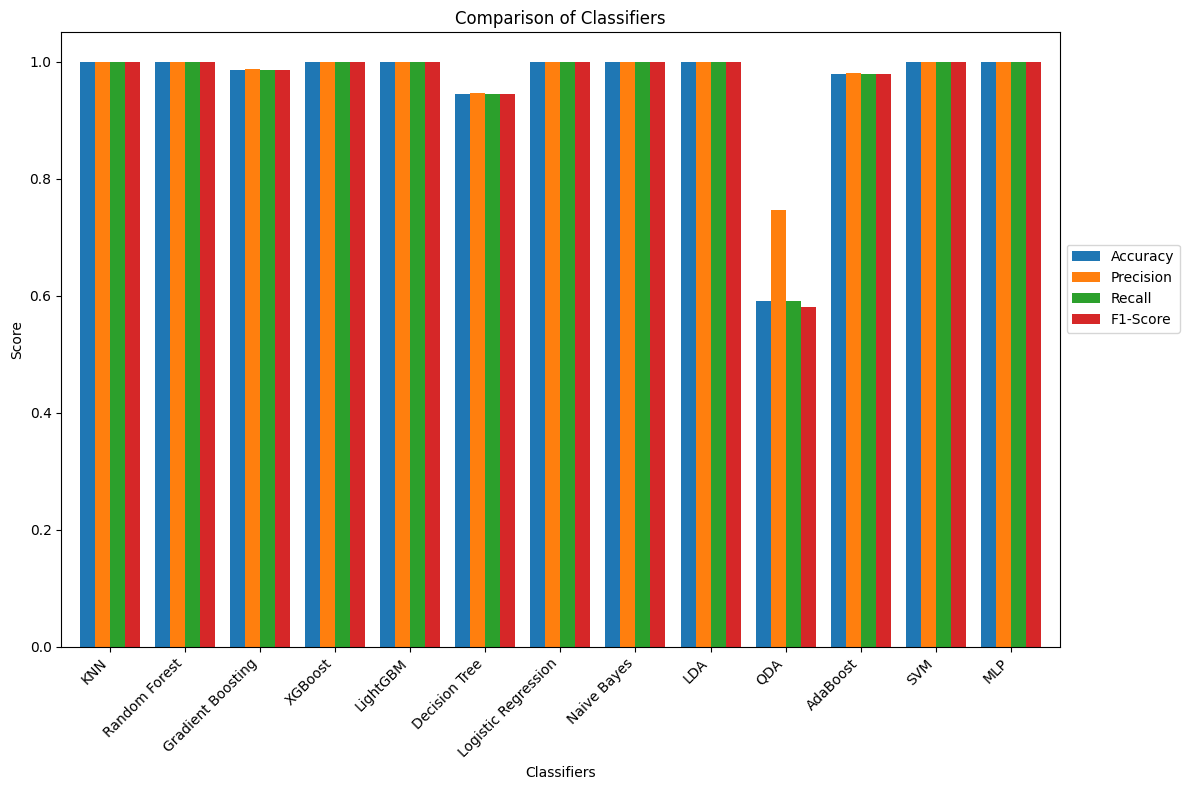

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Define the list of classifiers to be tested (excluding those not implemented)
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(kernel='linear', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,)),
}

# Encode the labels using LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
class_names = encoder.classes_

# Create empty lists to store results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []

# Create a figure to plot confusion matrix heatmap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))  # Adjusted to 4 rows and 4 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through classifiers and evaluate each one
for idx, (clf_name, clf) in enumerate(classifiers.items()):
    print(f"\nTesting {clf_name}...")

    # Train the classifier and predict
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)

    # Calculate accuracy and metrics
    accuracy = accuracy_score(Y_test, ypreds_test)
    class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)

    # Append the results
    accuracy_results.append(accuracy)
    precision_results.append(class_report['weighted avg']['precision'])
    recall_results.append(class_report['weighted avg']['recall'])
    f1_score_results.append(class_report['weighted avg']['f1-score'])

    # Generate confusion matrix for the classifier
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Plot confusion matrix as heatmap on the corresponding axis
    sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_title(f"Confusion Matrix: {clf_name}")
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

# Adjust layout and show confusion matrix heatmap
plt.tight_layout()
plt.show()

# Create a bar plot for comparing accuracy, precision, recall, and F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1-Score': f1_score_results
})

# Plot bar plot
results_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title("Comparison of Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()



Testing KNN...

Testing Random Forest...

Testing Gradient Boosting...

Testing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:48:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Testing LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97815
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 512
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.754019
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.838279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Testing Decision Tree...

Testing Logistic Regression...

Testing Naive Bayes...

Testing LDA...

Testing QDA...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p


Testing AdaBoost...

Testing SVM...

Testing MLP...


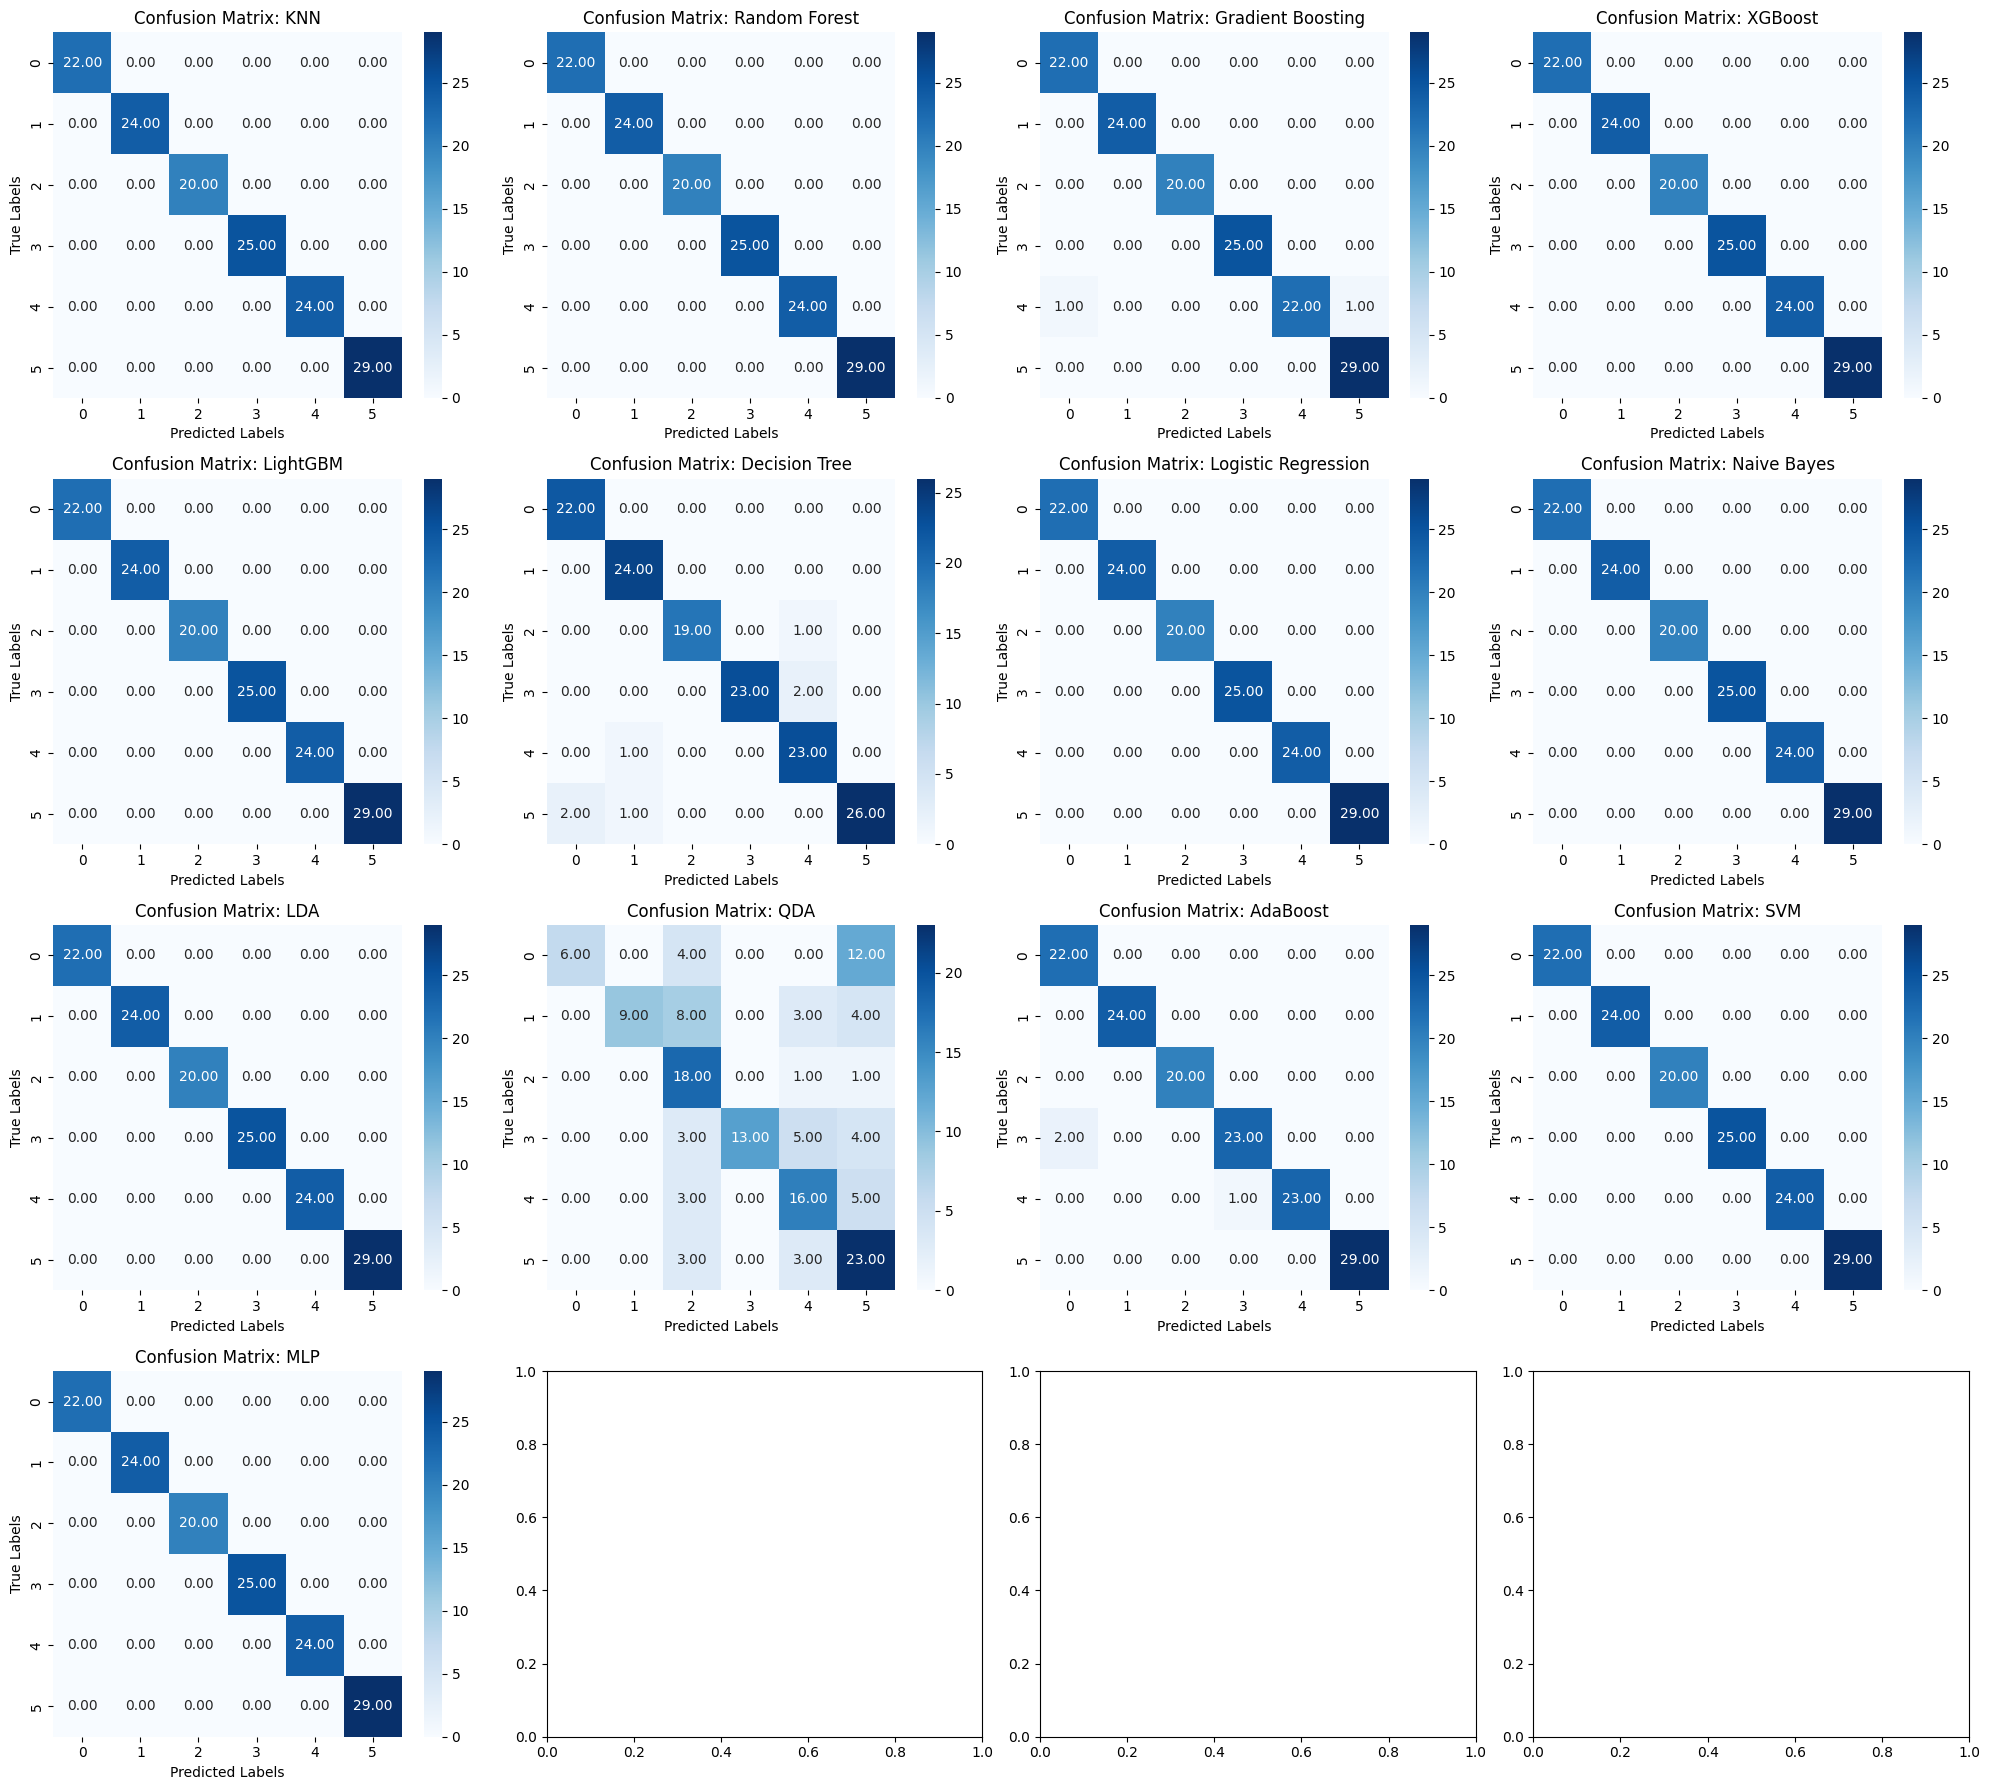

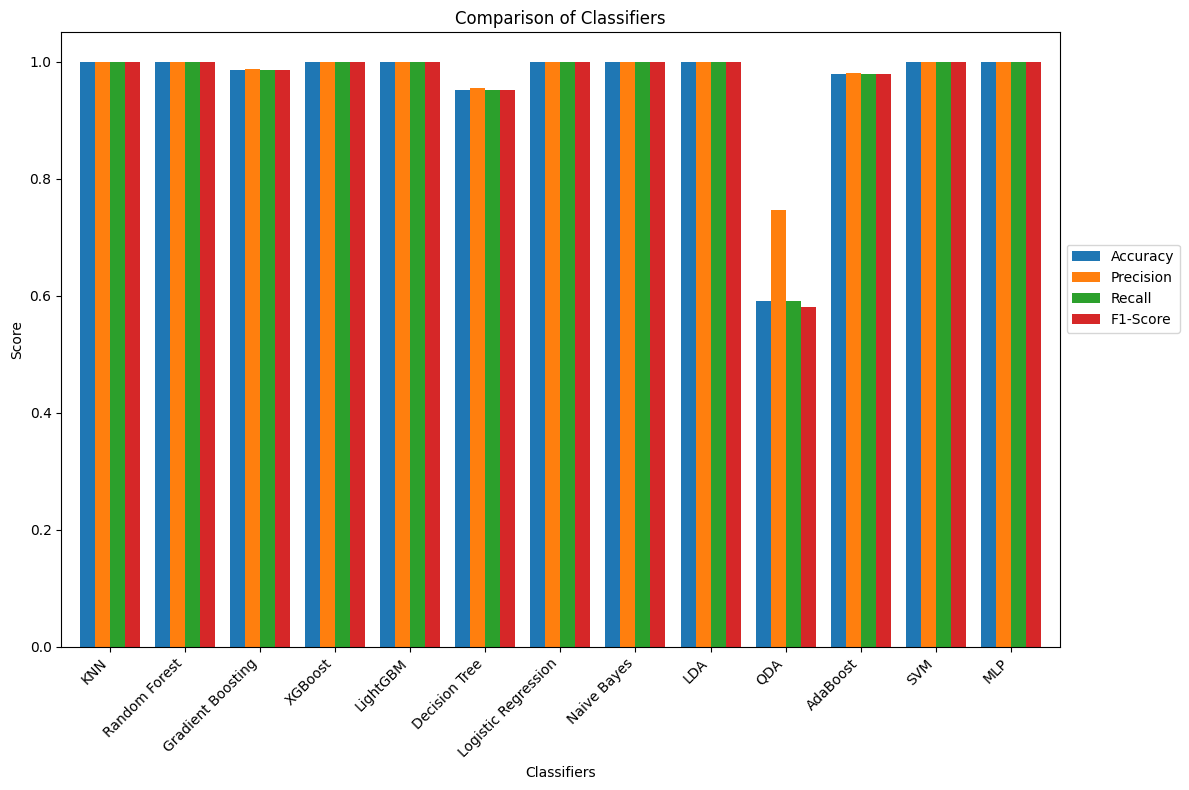

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97815
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 512
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.754019
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.838279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analys

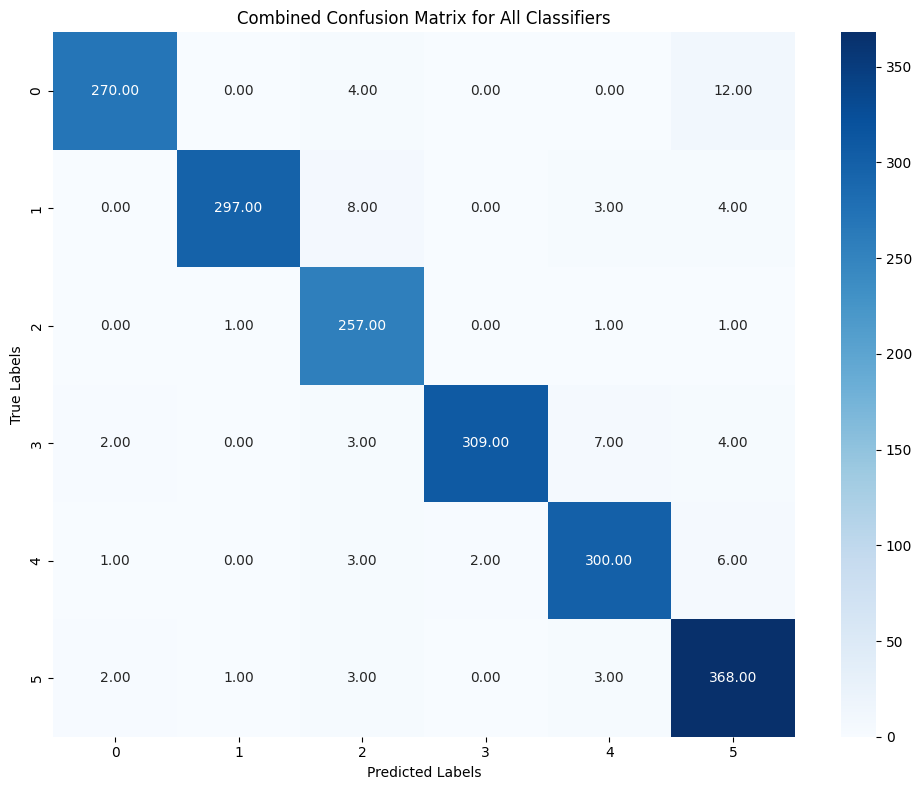

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Define the list of classifiers to be tested (including SVM)
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(kernel='linear', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,)),
}

# Encode the labels using LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
class_names = encoder.classes_

# Create empty lists to store results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []

# Create a figure to plot confusion matrix heatmap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))  # Adjusted to 4 rows and 4 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through classifiers and evaluate each one
for idx, (clf_name, clf) in enumerate(classifiers.items()):
    print(f"\nTesting {clf_name}...")

    # Train the classifier and predict
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)

    # Calculate accuracy and metrics
    accuracy = accuracy_score(Y_test, ypreds_test)
    class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)

    # Append the results
    accuracy_results.append(accuracy)
    precision_results.append(class_report['weighted avg']['precision'])
    recall_results.append(class_report['weighted avg']['recall'])
    f1_score_results.append(class_report['weighted avg']['f1-score'])

    # Generate confusion matrix for the classifier
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Ensure confusion matrix values are integers (for proper heatmap)
    confusion_mat_test = confusion_mat_test.astype(float)

    # Plot confusion matrix as heatmap on the corresponding axis
    sns.heatmap(confusion_mat_test, annot=True, fmt=".2f", cmap="Blues", ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_title(f"Confusion Matrix: {clf_name}")
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

# Adjust layout and show confusion matrix heatmap
plt.tight_layout()
plt.show()

# Create a bar plot for comparing accuracy, precision, recall, and F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1-Score': f1_score_results
})

# Plot bar plot
results_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title("Comparison of Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Create a combined confusion matrix for all classifiers
# First, create an empty confusion matrix of size (num_classes, num_classes) * number of classifiers
total_classes = len(class_names)
combined_confusion = np.zeros((total_classes, total_classes))

# Add confusion matrices for all classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Ensure confusion matrix values are integers (for proper heatmap)
    confusion_mat_test = confusion_mat_test.astype(float)

    combined_confusion += confusion_mat_test

# Plot the combined confusion matrix
plt.figure(figsize=(10, 8))

# Ensure that confusion matrix is correctly formatted (float values)
sns.heatmap(combined_confusion, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Combined Confusion Matrix for All Classifiers")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()



Testing KNN...

Testing Random Forest...

Testing Gradient Boosting...

Testing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Testing LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97815
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 512
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.754019
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.838279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Testing Decision Tree...

Testing Logistic Regression...

Testing Naive Bayes...

Testing LDA...

Testing QDA...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p


Testing AdaBoost...

Testing SVM...

Testing MLP...


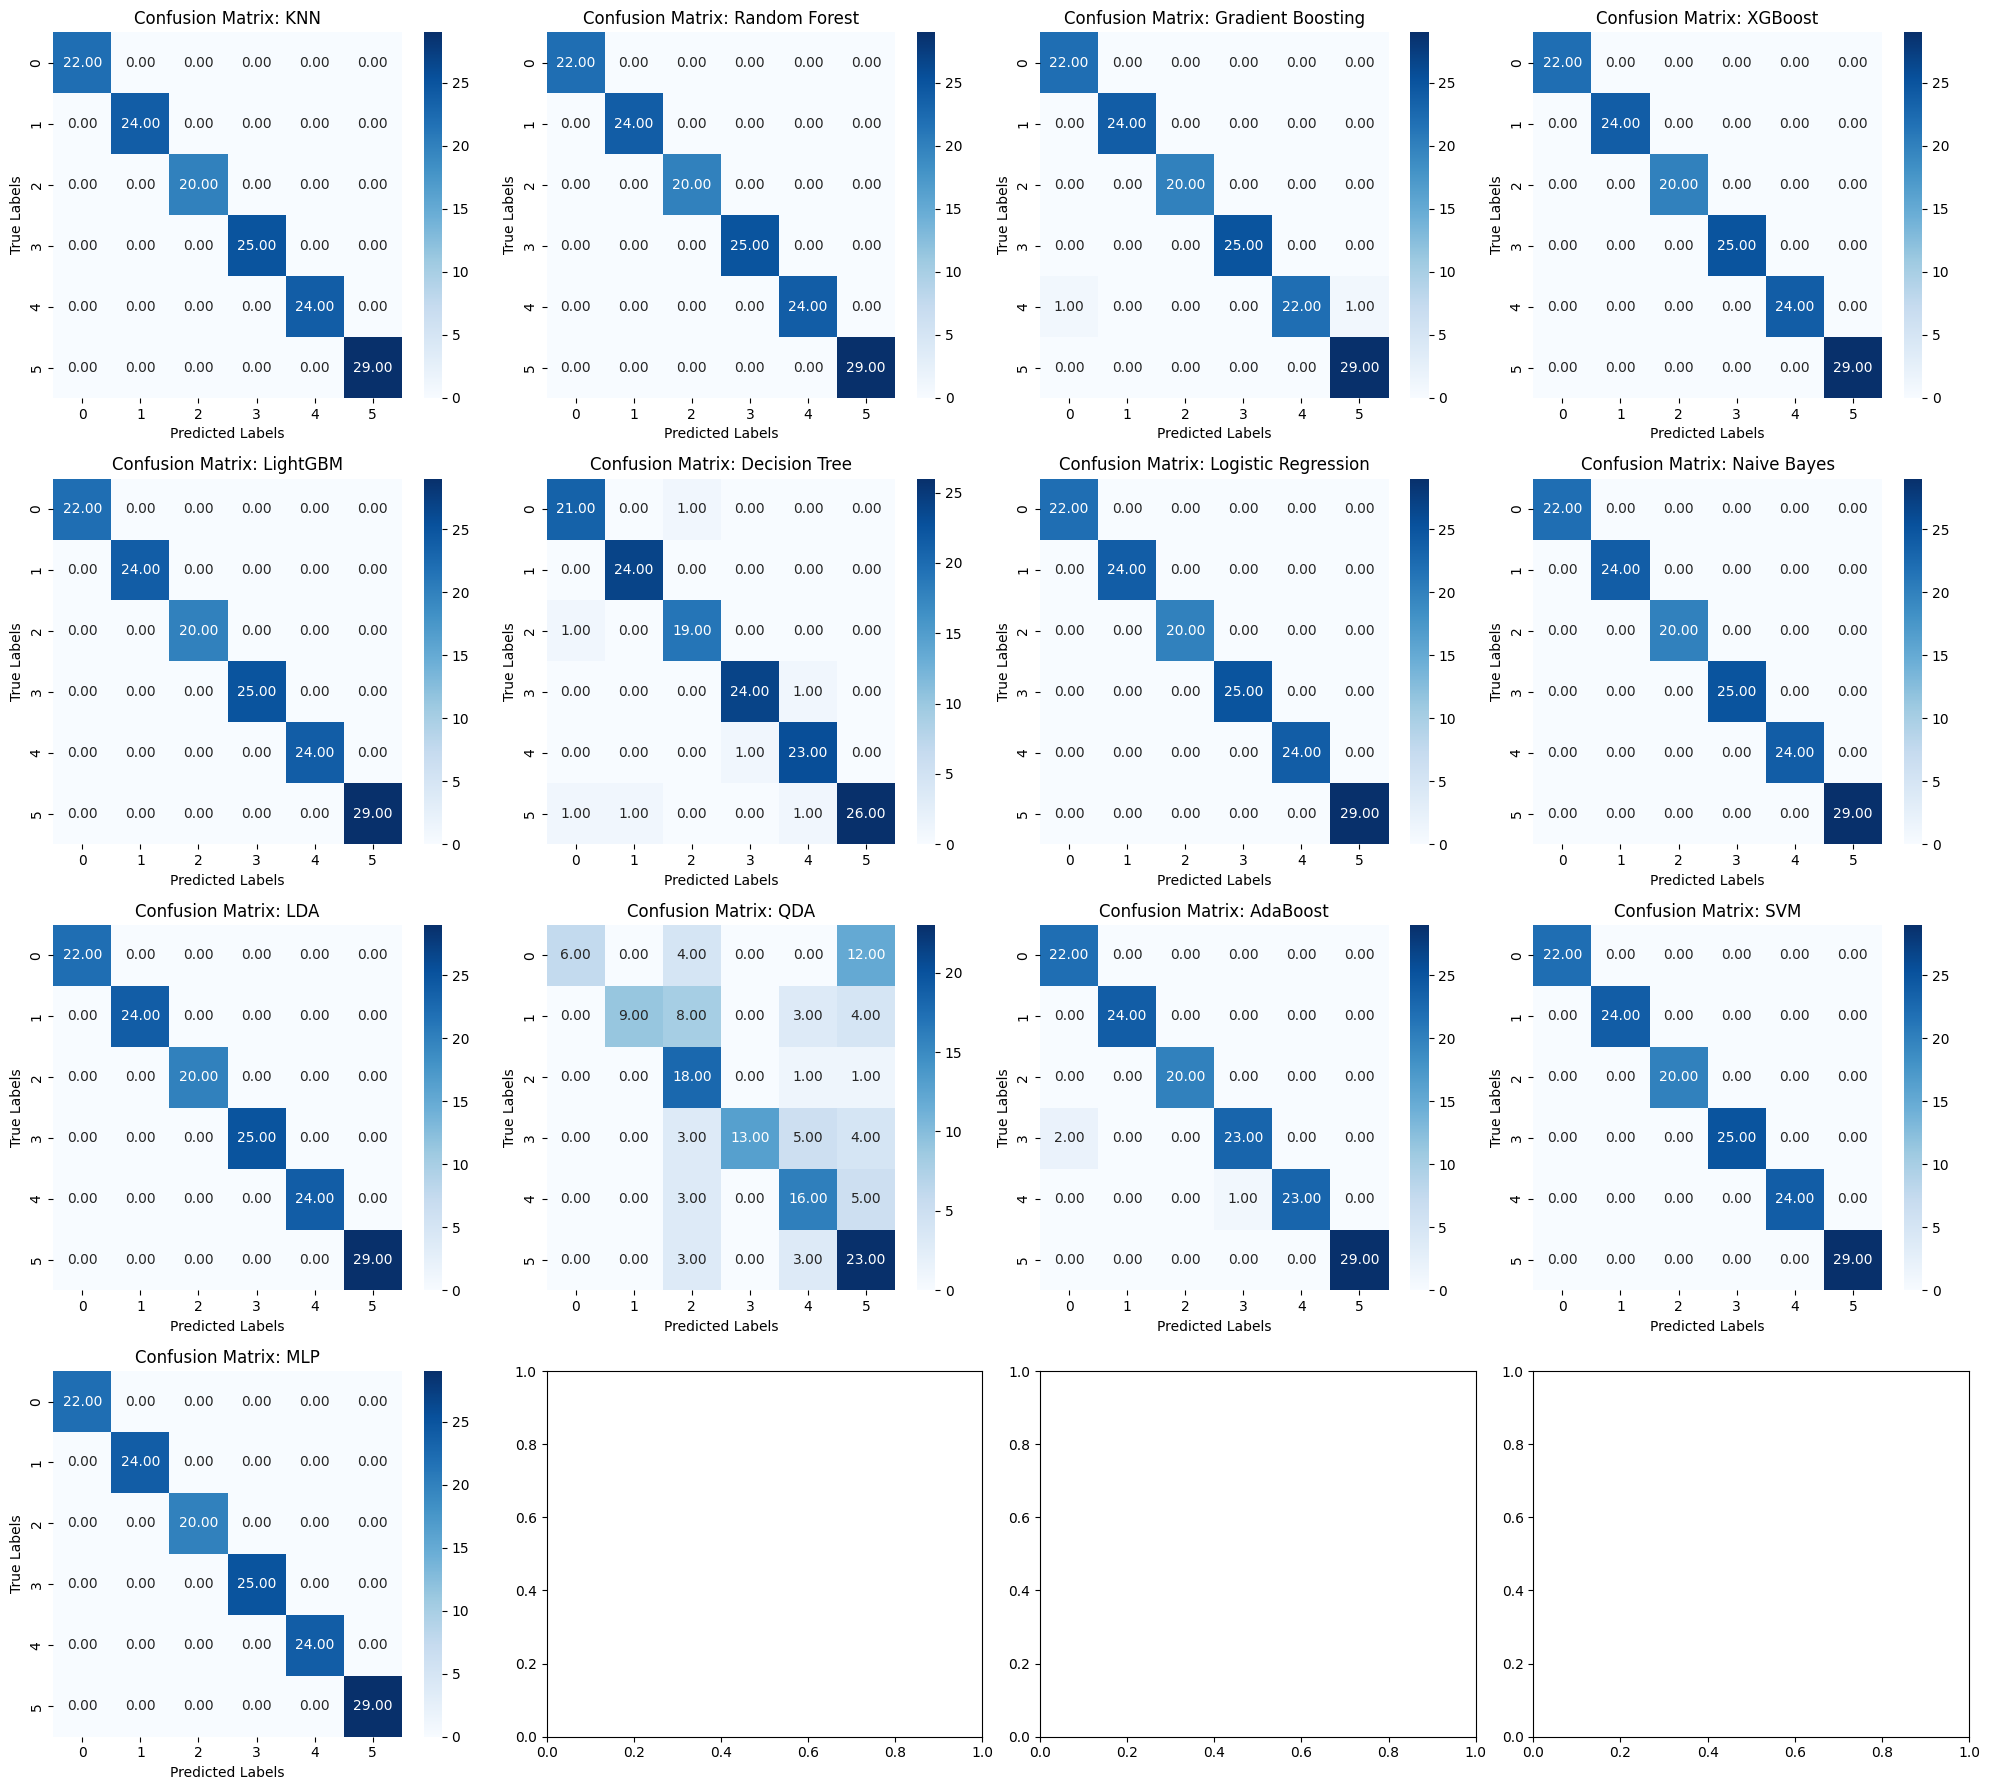

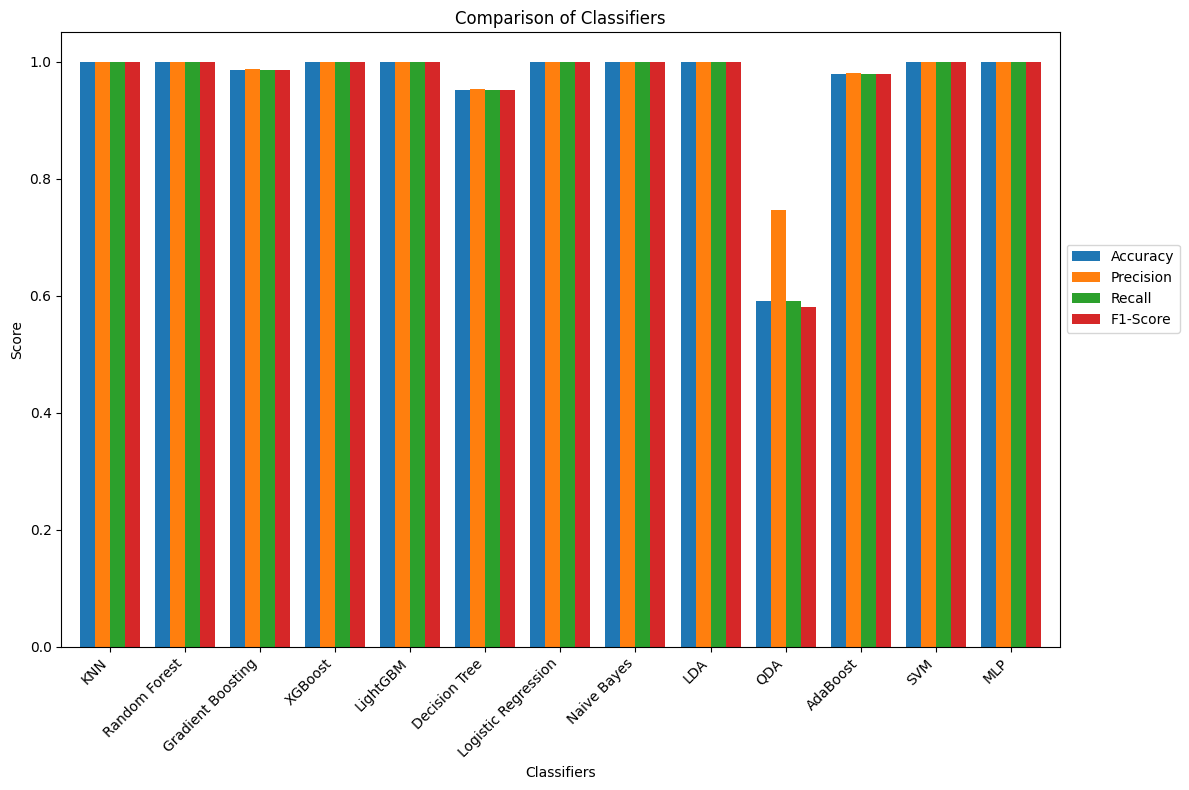

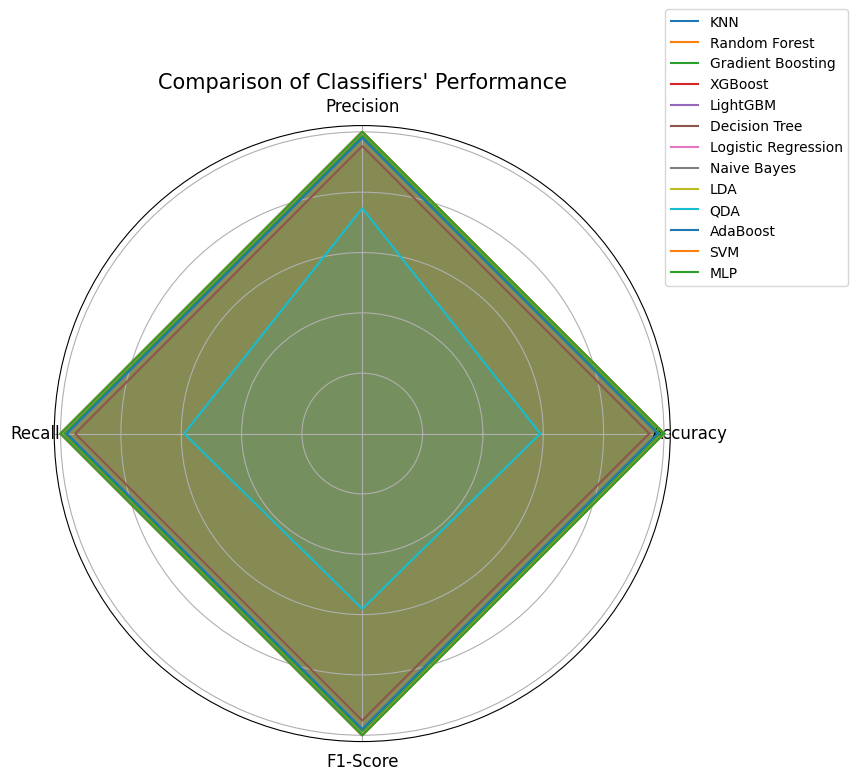

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:55:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97815
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 512
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.754019
[LightGBM] [Info] Start training from score -1.795262
[LightGBM] [Info] Start training from score -1.784791
[LightGBM] [Info] Start training from score -1.838279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analys

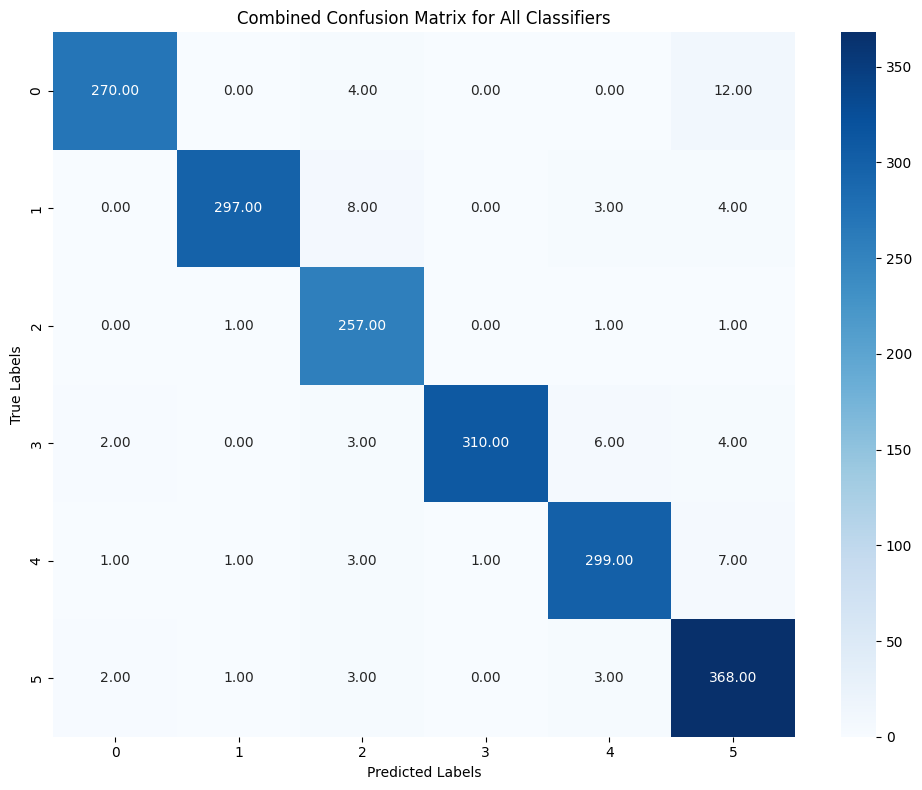

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

# Define the classifiers to test
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(kernel='linear', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,)),
}

# Encode the labels using LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
class_names = encoder.classes_

# Create empty lists to store results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []

# Create a figure to plot confusion matrix heatmap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))  # Adjusted to 4 rows and 4 columns
axes = axes.flatten()

# Loop through classifiers and evaluate each one
for idx, (clf_name, clf) in enumerate(classifiers.items()):
    print(f"\nTesting {clf_name}...")

    # Train the classifier and predict
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)

    # Calculate accuracy and metrics
    accuracy = accuracy_score(Y_test, ypreds_test)
    class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)

    # Append the results
    accuracy_results.append(accuracy)
    precision_results.append(class_report['weighted avg']['precision'])
    recall_results.append(class_report['weighted avg']['recall'])
    f1_score_results.append(class_report['weighted avg']['f1-score'])

    # Generate confusion matrix for the classifier
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Ensure confusion matrix values are integers (for proper heatmap)
    confusion_mat_test = confusion_mat_test.astype(float)

    # Plot confusion matrix as heatmap on the corresponding axis
    sns.heatmap(confusion_mat_test, annot=True, fmt=".2f", cmap="Blues", ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_title(f"Confusion Matrix: {clf_name}")
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

# Adjust layout and show confusion matrix heatmap
plt.tight_layout()
plt.show()

# Create a bar plot for comparing accuracy, precision, recall, and F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1-Score': f1_score_results
})

# Plot bar plot
results_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title("Comparison of Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Radar Chart to compare classifiers
# Prepare the data for Radar Chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy_results, precision_results, recall_results, f1_score_results]

# Create a DataFrame to easily handle data for Radar Chart
metrics_df = pd.DataFrame(metrics_values, columns=classifiers.keys(), index=labels)

# Function to create radar chart
def radar_chart(data, labels, title):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop over each classifier and plot its data
    for idx, clf in enumerate(data.columns):
        values = data[clf].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=clf)
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title(title, size=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.2))
    plt.show()

# Create Radar Chart
radar_chart(metrics_df, labels, "Comparison of Classifiers' Performance")

# Create a combined confusion matrix for all classifiers
# First, create an empty confusion matrix of size (num_classes, num_classes) * number of classifiers
total_classes = len(class_names)
combined_confusion = np.zeros((total_classes, total_classes))

# Add confusion matrices for all classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Ensure confusion matrix values are integers (for proper heatmap)
    confusion_mat_test = confusion_mat_test.astype(float)

    combined_confusion += confusion_mat_test

# Plot the combined confusion matrix
plt.figure(figsize=(10, 8))

# Ensure that confusion matrix is correctly formatted (float values)
sns.heatmap(combined_confusion, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Combined Confusion Matrix for All Classifiers")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store metrics for each classifier
metrics_summary = {}

# Loop through classifiers and calculate metrics
for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name}...")

    # Train the classifier and predict
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, ypreds_test)
    precision = precision_score(Y_test, ypreds_test, average='weighted')
    recall = recall_score(Y_test, ypreds_test, average='weighted')
    f1 = f1_score(Y_test, ypreds_test, average='weighted')

    # Store metrics in the dictionary
    metrics_summary[clf_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Display the metrics for each classifier
for clf_name, metrics in metrics_summary.items():
    print(f"\nClassifier: {clf_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


AttributeError: 'list' object has no attribute 'items'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

# Define the classifiers to test
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(kernel='linear', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,)),
}

# Encode the labels using LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
class_names = encoder.classes_

# Create empty lists to store results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []

# Create a figure to plot confusion matrix heatmap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))  # Adjusted to 4 rows and 4 columns
axes = axes.flatten()

# Loop through classifiers and evaluate each one
for idx, (clf_name, clf) in enumerate(classifiers.items()):
    print(f"\nTesting {clf_name}...")

    # Train the classifier and predict
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)

    # Calculate accuracy and metrics
    accuracy = accuracy_score(Y_test, ypreds_test)
    class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)

    # Append the results
    accuracy_results.append(accuracy)
    precision_results.append(class_report['weighted avg']['precision'])
    recall_results.append(class_report['weighted avg']['recall'])
    f1_score_results.append(class_report['weighted avg']['f1-score'])

    # Generate confusion matrix for the classifier
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Ensure confusion matrix values are integers (for proper heatmap)
    confusion_mat_test = confusion_mat_test.astype(float)

    # Plot confusion matrix as heatmap on the corresponding axis
    sns.heatmap(confusion_mat_test, annot=True, fmt=".2f", cmap="Blues", ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_title(f"Confusion Matrix: {clf_name}")
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

# Adjust layout and show confusion matrix heatmap
plt.tight_layout()
plt.show()

# Create a bar plot for comparing accuracy, precision, recall, and F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1-Score': f1_score_results
})

# Plot bar plot
results_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title("Comparison of Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Radar Chart to compare classifiers
# Prepare the data for Radar Chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy_results, precision_results, recall_results, f1_score_results]

# Create a DataFrame to easily handle data for Radar Chart
metrics_df = pd.DataFrame(metrics_values, columns=classifiers.keys(), index=labels)

# Function to create radar chart
def radar_chart(data, labels, title):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop over each classifier and plot its data
    for idx, clf in enumerate(data.columns):
        values = data[clf].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=clf)
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title(title, size=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.2))
    plt.show()

# Create Radar Chart
radar_chart(metrics_df, labels, "Comparison of Classifiers' Performance")

# Create a combined confusion matrix for all classifiers
# First, create an empty confusion matrix of size (num_classes, num_classes) * number of classifiers
total_classes = len(class_names)
combined_confusion = np.zeros((total_classes, total_classes))

# Add confusion matrices for all classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    ypreds_test = clf.predict(X_test)
    confusion_mat_test = confusion_matrix(Y_test, ypreds_test)

    # Ensure confusion matrix values are integers (for proper heatmap)
    confusion_mat_test = confusion_mat_test.astype(float)

    combined_confusion += confusion_mat_test

# Plot the combined confusion matrix
plt.figure(figsize=(10, 8))

# Ensure that confusion matrix is correctly formatted (float values)
sns.heatmap(combined_confusion, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Combined Confusion Matrix for All Classifiers")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


In [ ]:
# Generate a classification report
class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)


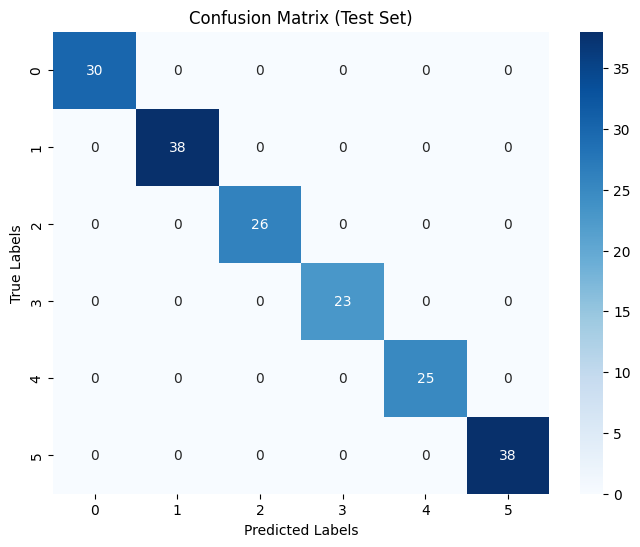

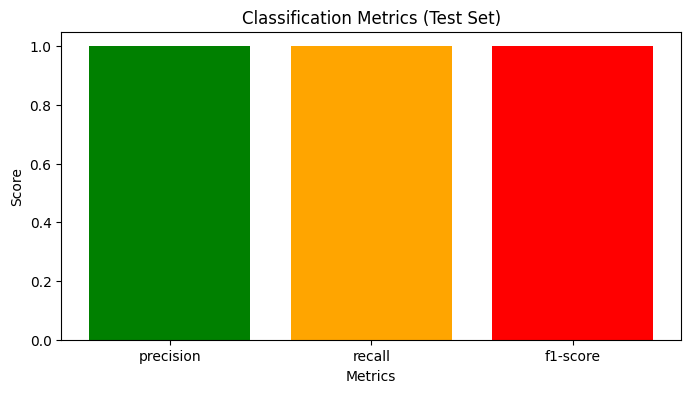

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have calculated confusion_mat_test, Y_test, and ypreds_test previously

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Define the class names
class_names = [
    "Ahmed-S20-0125-IT",
    "Aqib-S20-0122-IT",
    "Farhat-S20-0103-IT",
    "Haider-S20-0144-IT",
    " Hassan-S20-0120-IT",
    "M.Hassan-S20-0133-IT"
]


# Generate a classification report
class_report = classification_report(Y_test, ypreds_test, target_names=class_names, output_dict=True)

# Create a bar plot for precision, recall, and F1 score (excluding accuracy)
metrics = ['precision', 'recall', 'f1-score']
values = [class_report['weighted avg'][metric] for metric in metrics]
plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color=['green', 'orange', 'red'])
plt.title("Classification Metrics (Test Set)")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [ ]:
accuracy_score(Y_test,ypreds_test)

1.0

In [ ]:
import cv2
from mtcnn import MTCNN

# Load the pre-trained MTCNN model
detector = MTCNN()

# Load and convert the image
t_im = cv2.imread("/content/drive/MyDrive/project2/IMG-6954.jpg")
t_im = cv2.cvtColor(t_im, cv2.COLOR_BGR2RGB)

# Detect faces in the image
results = detector.detect_faces(t_im)

# Check if any faces were detected
if len(results) > 0:
    x, y, w, h = results[0]['box']

    # Use the bounding box coordinates as needed
    print("Bounding box:", (x, y, w, h))
else:
    print("No faces detected.")


1/1 [==============================] - 0s 134ms/step
Bounding box: (462, 943, 241, 312)


In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 120ms/step


In [ ]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [ ]:
ypreds

array([0])

In [ ]:
encoder.inverse_transform(ypreds)

array(['Ahmed-S20-0125-BS-CS-7th-A'], dtype='<U27')

In [ ]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (Y_train) and predicted labels (ypreds_train)
accuracy = accuracy_score(Y_train, ypreds_train)
precision = precision_score(Y_train, ypreds_train, average='weighted')
recall = recall_score(Y_train, ypreds_train, average='weighted')
f1 = f1_score(Y_train, ypreds_train, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (Y_test) and predicted labels (ypreds_test) for the test data
accuracy = accuracy_score(Y_test, ypreds_test)
precision = precision_score(Y_test, ypreds_test, average='weighted')
recall = recall_score(Y_test, ypreds_test, average='weighted')
f1 = f1_score(Y_test, ypreds_test, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


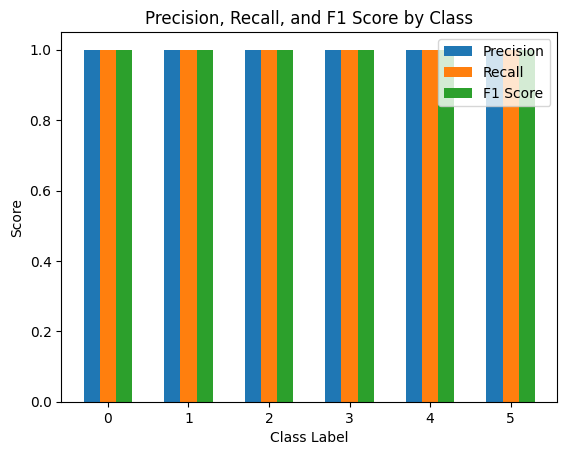

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (Y_train) and predicted labels (ypreds_train)
num_classes = len(np.unique(Y_train))
precision = []
recall = []
f1 = []

for class_label in range(num_classes):
    y_true_class = (Y_train == class_label)
    y_pred_class = (ypreds_train == class_label)

    precision_class = precision_score(y_true_class, y_pred_class)
    recall_class = recall_score(y_true_class, y_pred_class)
    f1_class = f1_score(y_true_class, y_pred_class)

    precision.append(precision_class)
    recall.append(recall_class)
    f1.append(f1_class)

# Plot Precision, Recall, and F1 Score
class_labels = np.unique(Y_train)
x = np.arange(len(class_labels))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1 Score')

ax.set_xlabel('Class Label')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have calculated Y_test and ypreds_test previously
# Y_test contains true labels, ypreds_test contains predicted labels

# Calculate accuracy
accuracy = accuracy_score(Y_test, ypreds_test)

# Calculate precision
precision = precision_score(Y_test, ypreds_test, average='weighted')

# Calculate recall
recall = recall_score(Y_test, ypreds_test, average='weighted')

# Calculate F1 score
f1 = f1_score(Y_test, ypreds_test, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
